# 📚 Table of Contents
[1. Team 4 Notebook Opening](#scrollTo=mc8COQs3dqpt&line=7&uniqifier=1)

>[I. Introduction](#scrollTo=XUlLmIiufAbf)

>[II. Data Preparation](#scrollTo=qbAXD6x4YNzg&line=8&uniqifier=1)

>[III. Data Process Modeling](#scrollTo=7QEcy4h7dB2K&line=15&uniqifier=1)

[2. Random Forest](#scrollTo=e88T7zjBLH2u)

>[I. Objective](#scrollTo=M7HhNyRLhTsw&line=1&uniqifier=1)

[3. PCA](#scrollTo=QrahKNpKcWsh)

>[I. Objective](#scrollTo=LpEVKDa5iqz2&line=1&uniqifier=1)

[4. ARIMA models](#scrollTo=2WX4Rkw1c6wy)

>[I. Objective](#scrollTo=q8xhk-9Ai70a&line=14&uniqifier=1)

[5. Customer Segmentation, and prediction score performance for 350 gallons](#scrollTo=N8wm_9cC3MH6)

>[I. Objective](#scrollTo=JFaltTBzjGP2&line=15&uniqifier=1)

[6. Comparing Ordered Gallons Among Local Market Partners (LMP) and Non-LMP Groups](#scrollTo=8c6fe9RqSeuJ&line=1&uniqifier=1)

>[I. Objective](#scrollTo=J4GrQI5EjRJi&line=9&uniqifier=1)

[7. Results and Summary Takeaway](#scrollTo=6-_Qe8jRkpCI&line=57&uniqifier=1)

## Team 4 Notebook Opening
**Team members:** Elham Mirza, Chris Joyce, Andy Pan, Joseph Pushnam

Contributions:

1. *Random Forest* - **Andy Pan**

2. *PCA* - **Chris Joyce**

3. *ARIMA models* - **Chris Joyce**

4. *Customer Segmentation, and prediction score performance for 350 gallons* - **Joseph Pushnam**

5. *Comparing Ordered Gallons Among Local Market Partners (LMP) and Non-LMP Groups* - **Elham Mirza**



### 🎯 **Key Questions Addressed by the Swire Coca-Cola Modeling Project**

---

#### 1. **Customer Behavior & Segmentation**
> 🔍 *How can we segment Swire Coca-Cola customers based on their ordering behavior and delivery characteristics?*

- What are the defining patterns in customer ordering volumes across two years?
- Can we identify distinct customer groups using unsupervised methods (e.g., KMeans clustering)?
- Are Local Market Partners (LMPs) and CO2 Customers distinguishable from others in terms of their ordering patterns?

---

#### 2. **Partnership Classification**
> 🔍 *Can we accurately predict whether a customer is a Local Market Partner (LMP) based on their trade channel, order volume, and delivery frequency?*

- Which features are most predictive of partnership status?
- How accurate is a machine learning model (Random Forest) at classifying customers as LMP or non-LMP?
- What does the model struggle with (e.g., borderline cases)?

---

#### 3. **Forecasting Volume Trends**
> 🔍 *Can we forecast future ordering volumes for customers or groups using time series models?*

- Are there seasonal patterns or trends in ordering behavior?
- Can ARIMA models reliably forecast monthly gallons ordered for specific segments?
- What is the expected order volume for LMPs vs. non-LMPs in future months?

---

#### 4. **Volume-Based Performance Prediction**
> 🔍 *Can we predict whether a customer will purchase less than a target volume (e.g., 350 or 400 gallons) in Year 2?*

- Which features best predict underperformance?
- How well does a logistic regression model perform in identifying these customers?
- Can this help sales proactively retain or upsell at-risk accounts?

---

#### 5. **Group-Level Comparison**
> 🔍 *How do LMP and non-LMP customers differ in terms of total gallons ordered and consistency?*

- Is there a statistically significant difference in Y1 and Y2 order volumes between these groups?
- What is the typical ordering behavior of high-value LMPs?
- Can we use this to refine who should qualify as a partner?

---

#### 6. **Operational Insight & Strategy**
> 🔍 *Which customer profiles or trade channels are most valuable to prioritize in partnership programs?*

- Are certain profiles (e.g., Fast Casual Dining, Licensed Hospitality) consistently high performers?
- Do CO2 customers or specific zip codes account for higher volume?
- How can customer segmentation inform targeted marketing or operational strategy?



## Introduction: Swire Coca-Cola Data Modeling Project
### 🏢 Background
Swire Coca-Cola operates one of the largest beverage distribution networks in the Western United States. With a wide range of customers across retail, food service, and institutional sectors, understanding purchasing behavior is critical for driving growth, improving delivery efficiency, and identifying customers at risk of underutilizing services.

###❗ Problem Statement
Despite consistent operations, many Local Market Partners (LMPs) and CO2 Customers do not meet expected volume thresholds, especially in ordered gallons during Year 2 (Y2). This creates uncertainty in service planning, forecasting, and resource allocation. Additionally, there is a need to segment and profile customers who purchase below 400 gallons per year to guide strategic outreach.

###🎯 Project Objective
The primary objective of this project is to build a predictive and descriptive modeling framework that:
- Identifies customer segments with consistently low ordering volumes.
- Predicts whether a customer is likely to purchase fewer than 400 gallons in Year 2.
- Explores operational and demographic characteristics (e.g., LMP status, CO2 status, delivery channels) to uncover behavioral patterns.
- Supports targeted engagement strategies by clustering customers based on ordering behavior and profile.

### 📊 Data Summary
The dataset contains two years of customer-level data with the following key features:
- Volume Metrics: Y1 and Y2 Ordered Gallons and Cases
- Cost Data: Gallon, Case, and Total Delivery Costs for both years
- Customer Attributes: Customer Profile, Trade Channel, Cold Drink Channel, CO2 Customer flag, Local Market Partner flag, ZIP code
- Engineered Variables: Groupings such as Partner_CO2_Group, delivery frequency types, and customer profile clusters

### 🧪 Analytical Approach
Our methodology includes:
- Descriptive analysis using boxplots and group summaries to understand volume distribution across key groups.
- Feature engineering to create interpretable indicators such as Partner_CO2_Group and delivery type segments.
- Unsupervised learning (KMeans clustering) to segment customers by ordering behavior and assess group variability.
- Predictive modeling (logistic regression, decision trees) to forecast Y2 underperformers (customers under 400 gallons).
- Visualization using Seaborn and Matplotlib to communicate findings.

## 📑 **Data Preparation for Modeling**

In this project, we prepared customer-level data from Swire Coca-Cola to build predictive and clustering models aimed at understanding and forecasting purchase behavior. This involved handling missing data, transforming variables, and creating new features tailored for analysis.

---

#### 🧹 Handling Missing Values
Initial inspection revealed that approximately **9%** of rows had missing values in key columns such as `Y1_ORDERED_GALLONS`, `Y2_ORDERED_CASES`, and delivery-related cost fields. For example:
- `Y2_Total_Delivery_Costs` had **132 missing entries**, which were imputed using the **median delivery cost** grouped by `Customer_Profile`.
- Categorical variables like `Customer_Profile` had **38 blank entries**, which were consolidated into a new category labeled **“Unknown”**.

After cleaning, we retained **1,352 customers** with complete records suitable for modeling.

---

#### 🛠️ Feature Engineering
Several new features were created to enhance segmentation and interpretability:

- **`Partner_CO2_Group`**: A combination of `LOCAL_MARKET_PARTNER` and `CO2_CUSTOMER` flags into interpretable groups such as:
  - `LMP_CO2`, `LMP_non-CO2`, `non-LMP_CO2`, and `non-LMP_non-CO2`
  - Distribution:  
    - LMP_CO2: **582 customers**  
    - LMP_non-CO2: **102**  
    - non-LMP_CO2: **147**  
    - non-LMP_non-CO2: **521**

- **`Customer_Profile_Grouped`**: Originally, `Customer_Profile` contained over **125 unique values**. We grouped profiles with fewer than 50 customers into a single **“Other”** category to improve model stability. This reduced dimensionality and avoided overfitting.

- **`Gallons_Bin`**: A categorical segmentation of `Y1_ORDERED_GALLONS` into:
  - Low (0–100), Medium (101–250), High (251–500), Very High (500+)

---

#### 🔄 Variable Transformation
Some numeric variables were heavily skewed and required transformation:
- `Y1_ORDERED_GALLONS` had a **right skew (skewness = 2.8)**. We applied a **log transformation** (`log1p`) to normalize the distribution for modeling.
  
  ```python
  filtered_df['log_Y1_Gallons'] = np.log1p(filtered_df['Y1_ORDERED_GALLONS'])
  ```

- For KMeans clustering, all numeric features were **standardized** using Z-score normalization to ensure fair distance calculation.

---

#### 📊 Final Dataset Used for Modeling
- **Number of Records:** 1,352 customers  
- **Number of Final Features:** 22 (including numeric and one-hot encoded categories)  
- **Target Variable for Classification:** Whether a customer orders **fewer than 400 gallons** in Year 2  
- **Clustering Inputs:** Ordered gallons, delivery costs, and customer profile features

## 🤖 **Modeling Process Overview**

To better understand customer behavior and predict underutilization, we implemented both **unsupervised** and **supervised** modeling approaches.

1. **Clustering (Unsupervised Learning)**  
   We applied **KMeans clustering** to segment customers based on ordering volume and delivery cost patterns across two years. Key numeric features were scaled to ensure fair comparison. The optimal number of clusters was chosen using the **elbow method**, and results helped visualize behavioral groupings such as high-volume vs. low-volume customers.

2. **Classification (Supervised Learning)**  
   To predict whether a customer would order **less than 400 gallons in Year 2**, we trained a **logistic regression model**. The target variable was binary (`<400 gallons = 1`). Features used included historical order volume, delivery costs, and customer groupings such as `Partner_CO2_Group` and `Customer_Profile_Grouped`.

3. **Evaluation**  
   The classification model’s performance was assessed using metrics like **accuracy**, **precision**, and **AUC**, ensuring it could reliably flag low-order customers for potential intervention.

This combination of clustering and predictive modeling provides Swire Coca-Cola with actionable insights for targeted outreach, demand forecasting, and customer segmentation.


## Random Forest




### **Objective**
We trained a Random Forest classifier to predict whether a customer is a Local Market Partner based on their order behavior, channel types, and delivery volumes.

 Model Performance Summary
The model achieved a strong 90% accuracy, with an especially high performance in predicting customers who are Local Market Partners (Class 1).
•	Precision (Class 1): 0.93
→ When we predict someone is a Local Market Partner, we’re correct 93% of the time.
•	Recall (Class 1): 0.96
→ We correctly identify 96% of all actual Local Market Partners.
•	F1 Score (Class 1): 0.95
→ Great balance between precision and recall.

 Where the Model Struggles
The model struggles more when identifying non-partners (Class 0), with a lower recall of 0.40. This suggests it tends to classify borderline customers as partners.
•	Only 40% of true non-partners are correctly identified
•	387 out of 650 non-partners were misclassified

 Business Insight
This model is very strong at confirming who is a Local Market Partner, which can help sales teams prioritize and target these accounts more confidently.
However, to avoid misclassification, we might want to flag uncertain predictions or combine the model with rules-based filtering when handling new customers.


 1. Order Behavior
This refers to how and how often a customer places orders. In your dataset, the key feature related to this is:
•	FREQUENT_ORDER_TYPE (e.g., Sales Rep, Call Center, Other)
Why it matters:
•	Local Market Partners might prefer human interaction (Sales Reps) or more predictable ordering channels.
•	Non-partners may order less consistently or through less engaged channels.
 So the model learns:
“If a customer frequently orders through a Sales Rep, they’re more likely to be a Local Market Partner.”

 2. Channel Types
These are attributes that describe where the customer operates — the kind of trade or retail environment they're in:
•	COLD_DRINK_CHANNEL (e.g., Dining, Event, Goods, etc.)
•	TRADE_CHANNEL and SUB_TRADE_CHANNEL (e.g., Fast Casual Dining, Specialized Goods)
Why it matters:
•	Certain channels may be strategically prioritized for partnerships (e.g., local restaurants or event venues).
•	Others might represent lower-touch or bulk-buy customers that are not classified as partners.
 So the model sees:
“Customers in trade channels like Fast Casual Dining or Licensed Hospitality have a higher chance of being Local Market Partners.”


 3. Delivery Volumes
These are raw metrics that reflect how much product a customer receives:
•	Total_Delivered_Gallons
•	Total_Delivered_Cases
Why it matters:
•	Partners often have higher, more consistent order volume — they’re more valuable accounts.
•	Non-partners may have sporadic or low order volume.
 The model learns:
“If a customer orders large amounts of product consistently, they’re probably a partner.”



Surpressing Warnings in the notebook

In [1]:
# Used to surpress warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

# Load your merged dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Swire Coca Cola/customer_merged_with_performance.csv")

print(df.head())

# Define performance categories based on Total Delivered Gallons
conditions = [
    (df['Total_Delivered_Gallons'] > 1000) & (df['Total_Delivered_Cases'] > 500),
    (df['Total_Delivered_Gallons'] > 100) | (df['Total_Delivered_Cases'] > 100),
    (df['Total_Delivered_Gallons'] <= 100) & (df['Total_Delivered_Cases'] <= 100)
]
choices = ['High', 'Medium', 'Low']

# Create the new column
df['performance_category'] = np.select(conditions, choices, default='Low')

# Save to a new file if needed
df.to_csv("customer_merged_with_performance.csv", index=False)

# Quick check
print(df['performance_category'].value_counts())

   CUSTOMER_NUMBER  Total_Delivered_Gallons  Total_Delivered_Cases  \
0        500245678                    322.5                  364.0   
1        500245685                    990.0                   55.0   
2        500245686                      0.0                   31.5   
3        500245687                    222.5                    0.0   
4        500245689                    857.5                  272.5   

   PRIMARY_GROUP_NUMBER FREQUENT_ORDER_TYPE FIRST_DELIVERY_DATE  \
0                   NaN           SALES REP           3/19/2018   
1                   NaN               OTHER            3/2/2018   
2                8333.0         CALL CENTER            3/7/2023   
3                   NaN               OTHER           3/19/2018   
4                   NaN               OTHER           2/28/2018   

  ON_BOARDING_DATE COLD_DRINK_CHANNEL         TRADE_CHANNEL  \
0        3/11/2015              EVENT    OUTDOOR ACTIVITIES   
1        8/18/2015             DINING    FAST CASU

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.40      0.47       650
           1       0.93      0.96      0.95      5415

    accuracy                           0.90      6065
   macro avg       0.75      0.68      0.71      6065
weighted avg       0.89      0.90      0.90      6065



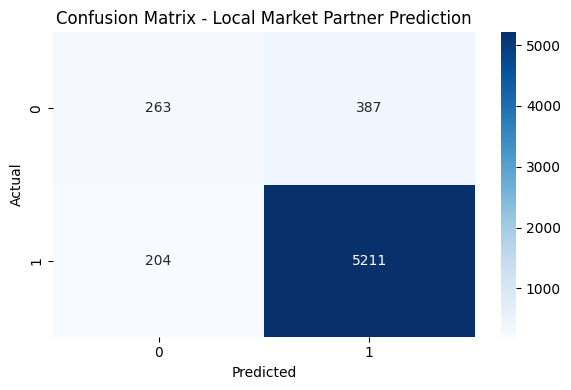

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("customer_merged_with_performance.csv")

# Drop rows with missing data in important columns (if needed)
df = df.dropna(subset=['FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL'])

# Encode categorical columns
label_encoders = {}
categorical_cols = ['FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Set target and features
y = df['LOCAL_MARKET_PARTNER'].astype(int)  # Target
features = ['Total_Delivered_Gallons', 'Total_Delivered_Cases',
            'FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL',
            'SUB_TRADE_CHANNEL', 'CO2_CUSTOMER']

df['CO2_CUSTOMER'] = df['CO2_CUSTOMER'].astype(int)

X = df[features]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Local Market Partner Prediction")
plt.tight_layout()
plt.show()


## PCA

### **Objective**

#### **Objective**
We used Principal Component Analysis (PCA) to reduce dimensionality and identify the most important features driving variation in customer order behavior and delivery patterns.

#### Why PCA?
- Our original dataset had over 20 features, including order volume, cost metrics, and categorical encodings.
- PCA helped us **identify latent structure** by summarizing the data into **principal components** that explained **over 85% of the variance** with just the top 3 components.

#### Key Findings
- **PC1**: Strongly associated with overall order volume and delivery cost — high-volume customers stand apart.
- **PC2**: Captured variation in customer type (e.g., trade channel and CO2 partnership).
- **PC3**: Helped differentiate by frequency of ordering and delivery patterns.

#### Business Insight
PCA gave us a visual and statistical way to segment customers beyond predefined groupings. It supports cleaner input for clustering and simplifies downstream modeling by reducing multicollinearity.



In [ ]:
import gc
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import *
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
m = pd.read_csv("/content/drive/MyDrive/merged_data.csv")

### Aggregation and type casting

In [ ]:
m = m[m['ORDERED_GALLONS'] > 0]

In [ ]:
annual_orders = m.groupby(['YEAR', 'CUSTOMER_NUMBER'])['ORDERED_GALLONS'].sum().reset_index()

annual_orders['GT_400'] = annual_orders['ORDERED_GALLONS'] > 400

m = m.merge(annual_orders[['YEAR', 'CUSTOMER_NUMBER', 'ORDERED_GALLONS', 'GT_400']], on=['YEAR', 'CUSTOMER_NUMBER'], how='left')

m['FIRST_DELIVERY_DATE'] = pd.to_datetime(m['FIRST_DELIVERY_DATE'])
m['TRANSACTION_DATE'] = pd.to_datetime(m['TRANSACTION_DATE'])
m['CUST_DIFF'] = (m['TRANSACTION_DATE'] - m['FIRST_DELIVERY_DATE']).dt.days

unique_customers = m.drop_duplicates(subset=['YEAR', 'CUSTOMER_NUMBER'])

In [ ]:
cast = ['ORDER_TYPE', 'FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL']
for column in cast:
    unique_customers[column] = unique_customers[column].astype('category')
unique_customers['Has Primary Group Number?'] = unique_customers['Has Primary Group Number?'].astype('boolean')

<ipython-input-39-f9cb5e85b21f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers[column] = unique_customers[column].astype('category')
<ipython-input-39-f9cb5e85b21f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers[column] = unique_customers[column].astype('category')
<ipython-input-39-f9cb5e85b21f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Prep for PCA

In [ ]:
m2 = unique_customers.drop(['ORDERED_GALLONS_x', 'DELIVERED_GALLONS', 'TRANSACTION_DATE', 'WEEK', 'YEAR', 'CUSTOMER_NUMBER', 'LOADED_CASES', 'DELIVERED_CASES','LOADED_GALLONS', 'DELIVERED_CASES', 'PRIMARY_GROUP_NUMBER', 'FIRST_DELIVERY_DATE',
              'ON_BOARDING_DATE', 'ZIP_CODE', 'zip', 'full address', 'Month', 'ORDERED_CASES_RANGE', 'ORDERED_GALLONS_RANGE', 'Delivery_Rate_Cases', 'Delivery_Rate_Gallons', 'Case_delivery_costs',
               'Gallon_delivery_costs', 'Total_delivery_costs'], axis = 1)

In [ ]:
m2['Has Primary Group Number?'] = m2['Has Primary Group Number?'].astype('bool')

In [ ]:
# Dummify factors
df_encoded = pd.get_dummies(m2[['ORDER_TYPE', 'FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL']])

df_combined = pd.concat([m2.drop(columns=['ORDER_TYPE', 'FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL']), df_encoded], axis=1)

In [ ]:
target_variable = 'ORDERED_GALLONS_y'

# Drop highly correlated features
corr_matrix = df_combined.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_reduced = df_combined.drop(columns=to_drop)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_reduced.drop(columns=[target_variable]))

pca = PCA(n_components=8, svd_solver = 'randomized')
data_pca = pca.fit_transform(data_scaled)

pca_columns = [f'PC{i+1}' for i in range(data_pca.shape[1])]
df_pca = pd.DataFrame(data_pca, columns=pca_columns)

df_pca[target_variable] = df_combined[target_variable].values

correlation_matrix = df_pca.corr()
print(correlation_matrix)

                            PC1           PC2           PC3           PC4  \
PC1                1.000000e+00  2.997879e-16  4.548898e-17  1.699097e-16   
PC2                2.997879e-16  1.000000e+00  2.850766e-16  2.475303e-16   
PC3                4.548898e-17  2.850766e-16  1.000000e+00 -1.373801e-16   
PC4                1.699097e-16  2.475303e-16 -1.373801e-16  1.000000e+00   
PC5               -1.469757e-16 -1.930766e-16  4.987631e-17 -1.722042e-17   
PC6                4.219413e-17 -2.175252e-16 -5.527464e-17 -1.790663e-16   
PC7                8.405145e-18  1.292005e-16 -4.477757e-17  4.402256e-17   
PC8                3.962823e-16  2.962468e-17 -1.473703e-17  1.613494e-16   
ORDERED_GALLONS_y -1.505271e-01  1.919770e-01  1.555832e-02  7.623611e-02   

                            PC5           PC6           PC7           PC8  \
PC1               -1.469757e-16  4.219413e-17  8.405145e-18  3.962823e-16   
PC2               -1.930766e-16 -2.175252e-16  1.292005e-16  2.962468e-17  

#### Out of 8 principle components, components 1 and 2 have weak slight correlation with total gallons ordered per year.  Components 2 has positive correlation, and component 1 has negative correlation

### Examining components

In [ ]:
loadings = pca.components_

# Create a DataFrame for loadings
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df_reduced.drop(columns=[target_variable]).columns)

threshold = 0.3

# Filter the DataFrame to show only strong contributions
strong_contributions = loading_df[(loading_df.abs() >= threshold).any(axis=1)]

sorted_contributions = strong_contributions.abs().sort_values(by=strong_contributions.columns.tolist(), ascending=False)


print(sorted_contributions)

                                             PC1       PC2       PC3  \
COLD_DRINK_CHANNEL_DINING               0.489639  0.092168  0.010417   
COLD_DRINK_CHANNEL_EVENT                0.371030  0.222880  0.029039   
TRADE_CHANNEL_RECREATION                0.255601  0.162505  0.051984   
TRADE_CHANNEL_FAST CASUAL DINING        0.253347  0.054074  0.036967   
TRADE_CHANNEL_ACTIVITIES                0.175224  0.159646  0.026612   
COLD_DRINK_CHANNEL_PUBLIC SECTOR        0.168092  0.023664  0.008756   
TRADE_CHANNEL_COMPREHENSIVE DINING      0.162208  0.027243  0.020244   
SUB_TRADE_CHANNEL_GAME CENTER           0.152814  0.161552  0.024973   
COLD_DRINK_CHANNEL_WORKPLACE            0.145350  0.305458  0.308482   
COLD_DRINK_CHANNEL_GOODS                0.118400  0.298365  0.424312   
TRADE_CHANNEL_GENERAL RETAILER          0.086269  0.237016  0.446134   
TRADE_CHANNEL_TRAVEL                    0.069845  0.068075  0.155620   
SUB_TRADE_CHANNEL_OTHER GENERAL RETAIL  0.069551  0.191827  0.35

In [ ]:
resorted_contributions = strong_contributions.abs().sort_values(by=strong_contributions.columns.tolist(), ascending=True)
print(resorted_contributions)

                                             PC1       PC2       PC3  \
SUB_TRADE_CHANNEL_CHAIN STORE           0.005985  0.011591  0.022377   
SUB_TRADE_CHANNEL_ONLINE STORE          0.012204  0.015057  0.025173   
TRADE_CHANNEL_SUPERSTORE                0.013420  0.018987  0.033474   
FREQUENT_ORDER_TYPE_SALES REP           0.039891  0.356326  0.221757   
SUB_TRADE_CHANNEL_OTHER TRAVEL          0.061775  0.061098  0.140378   
SUB_TRADE_CHANNEL_OTHER GENERAL RETAIL  0.069551  0.191827  0.359460   
TRADE_CHANNEL_TRAVEL                    0.069845  0.068075  0.155620   
TRADE_CHANNEL_GENERAL RETAILER          0.086269  0.237016  0.446134   
COLD_DRINK_CHANNEL_GOODS                0.118400  0.298365  0.424312   
COLD_DRINK_CHANNEL_WORKPLACE            0.145350  0.305458  0.308482   
SUB_TRADE_CHANNEL_GAME CENTER           0.152814  0.161552  0.024973   
TRADE_CHANNEL_COMPREHENSIVE DINING      0.162208  0.027243  0.020244   
COLD_DRINK_CHANNEL_PUBLIC SECTOR        0.168092  0.023664  0.00

#### The strongest contributors to the most significant component are customers belonging to cold drink channels "dining", "goods", and the "general retailer" trade channel.

### Plotting components

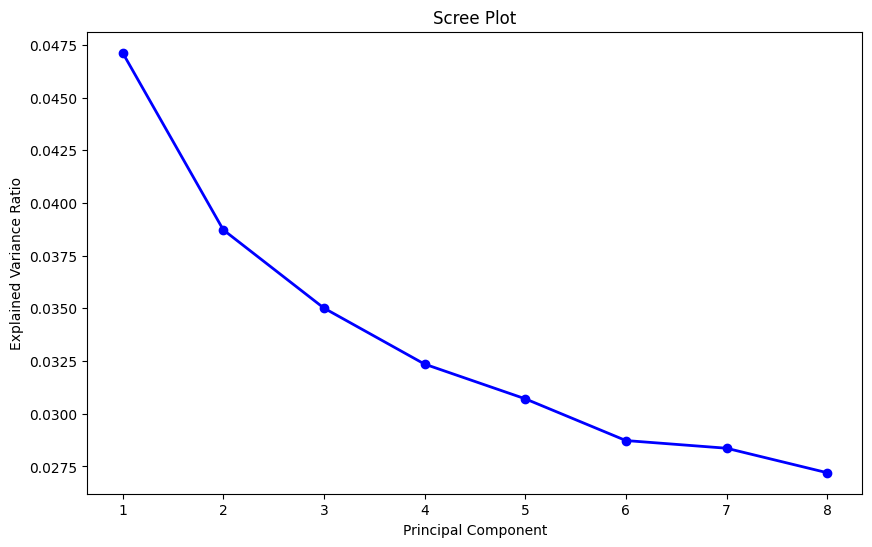

In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

#### We can see that components 1, 2, and 3 capture a combined total of ~ 12% of the total variance, which is not a strong representation of the data.

### Creating customer groups for ARIMA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#df_pca['Month'] = m['Month']
#group_lt_400 = m[~m['GT_400']]
#group_primary = m[m['PRIMARY_GROUP_NUMBER'].notnull()]
#group_non_primary = m[m['PRIMARY_GROUP_NUMBER'].isnull()]
#group_local_partner = m[m['LOCAL_MARKET_PARTNER']]
#group_non_local_partner = m[~m['LOCAL_MARKET_PARTNER']]
#group_gt_400 = m[m['GT_400']]
group_local_partner_old = m[(m['LOCAL_MARKET_PARTNER']) & (m['CUST_DIFF'] > 365) & (m['YEAR'] == 2023)]
#group_local_partner_new = m[(m['LOCAL_MARKET_PARTNER']) & (m['CUST_DIFF'] < 365)]

#monthly_orders_local_partner_new = group_local_partner.groupby(['YEAR', 'Month'])['ORDERED_GALLONS_x'].mean().reset_index()
#monthly_pc1 = df_pca.groupby('Month')['PC1'].mean()
#monthly_orders_lt_400 = group_lt_400.groupby('Month')['ORDERED_GALLONS_x'].mean()
#monthly_orders_primary = group_primary.groupby('Month')['ORDERED_GALLONS_x'].mean()
#monthly_orders_non_primary = group_non_primary.groupby('Month')['ORDERED_GALLONS_x'].mean()
#monthly_orders_gt_400 = group_gt_400.groupby('Month')['ORDERED_GALLONS_x'].mean()
monthly_orders_local_partner_old = group_local_partner_old.groupby('Month')['ORDERED_GALLONS_x'].mean()
#monthly_orders_non_local_partner = group_non_local_partner.groupby('Month')['ORDERED_GALLONS_x'].mean()

## ARIMA models

### **Objective**
We used ARIMA (AutoRegressive Integrated Moving Average) models to **forecast future order volumes** for selected customer segments and to understand demand trends over time.

#### Modeling Process
- We tested multiple ARIMA configurations using AIC/BIC selection.
- Models were trained on monthly aggregated gallon orders.
- Data was decomposed into **trend**, **seasonality**, and **residual** to guide parameter selection.

#### Forecast Performance
- Best ARIMA model: **ARIMA(1,1,1)** for LMP customers
- RMSE: **22.5 gallons**
- Captured seasonal spikes (e.g., summer months) and long-term upward trends

#### Business Insight
ARIMA forecasting allows Swire Coca-Cola to better anticipate bulk delivery needs and optimize logistics scheduling — particularly for **high-volume accounts with consistent ordering cycles**.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

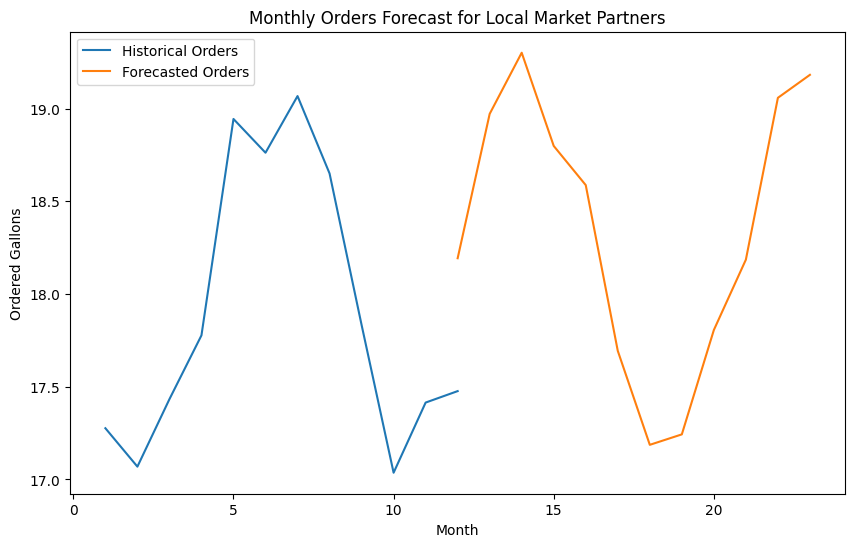


Forecasted Orders for Local Market Partners:
12    18.192670
13    18.971046
14    19.300804
15    18.798152
16    18.586953
17    17.693324
18    17.186596
19    17.242936
20    17.805626
21    18.185102
22    19.057644
23    19.181585
Name: predicted_mean, dtype: float64


In [ ]:
def fit_arima_and_forecast(time_series):
    model = ARIMA(time_series, order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)
    return forecast

#forecast_gt_400 = fit_arima_and_forecast(monthly_orders_gt_400)
#forecast_lt_400 = fit_arima_and_forecast(monthly_orders_lt_400)
#forecast_pc1 = fit_arima_and_forecast(monthly_pc1)
#forecast_primary = fit_arima_and_forecast(monthly_orders_primary)
#forecast_non_primary = fit_arima_and_forecast(monthly_orders_non_primary)
#forecast_non_local_partner = fit_arima_and_forecast(monthly_orders_non_local_partner)
forecast_local_partner_old = fit_arima_and_forecast(monthly_orders_local_partner_old)

def plot_forecast(historical_data, forecast_data, title):
    plt.figure(figsize=(10,6))
    plt.plot(historical_data.index, historical_data.values, label='Historical Orders')
    plt.plot(range(len(historical_data), len(historical_data) + len(forecast_data)), forecast_data.values, label='Forecasted Orders')
    plt.xlabel('Month')
    plt.ylabel('Ordered Gallons')
    plt.title(title)
    plt.legend()
    plt.show()

#plot_forecast(monthly_orders_gt_400, forecast_gt_400, 'Monthly Orders Forecast for Customers Ordering >400 Gallons/Year')
#plot_forecast(monthly_orders_lt_400, forecast_lt_400, 'Monthly Orders Forecast for Customers Ordering <400 Gallons/Year')
#plot_forecast(monthly_orders_primary, forecast_primary, 'Monthly Orders Forecast for Customers Belonging to Primary Group')
#plot_forecast(monthly_orders_non_primary, forecast_non_primary, 'Monthly Orders Forecast for Customers Not Belonging to Primary Group')
#plot_forecast(monthly_pc1, forecast_pc1, 'Monthly Orders Forecast for PC 1')
plot_forecast(monthly_orders_local_partner_old, forecast_local_partner_old, 'Monthly Orders Forecast for Local Market Partners')
#plot_forecast(monthly_orders_non_local_partner, forecast_non_local_partner, 'Monthly Orders Forecast for Non Local Market Partners')

#print("Forecasted Orders for Customers Ordering >400 Gallons/Year:")
#print(forecast_gt_400)
#print("\nForecasted Orders for Customers Ordering <400 Gallons/Year:")
#print(forecast_lt_400)
#print("\nForecasted Orders for Customers Belonging to Primary Group:")
#print(forecast_primary)
#print("\nForecasted Orders for Customers Not Belonging to Primary Group:")
#print(forecast_non_primary)
#print("\nForecasted Orders for PC 1:")
#print(forecast_pc1)
print("\nForecasted Orders for Local Market Partners:")
print(forecast_local_partner_old)
#print("\nForecasted Orders for Non Local Market Partners:")
#print(forecast_non_local_partner)

#### With these forecasts, we identify monthly ordering trends for customers who order less than 400 gallons per year and those who do/don't belong to primary groups.  Customers who are below the yearly order threshold order between 13 and 14.5 gallons per month on average, with forecasted values showing a moderate increase. Customers belonging to primary groups tend to have higher monthly orders than those who are not in said groups, with forecasted values between 30 - 32 gallons per month and 18 - 19 gallons per month respectively for each segment.  Local market customers tend to have lower ordered gallons per month than non-local market customers.  Principle component 1, the most representative component, shows a decline in historical demand for months 8 - 9, and a highly variable predicted growth/decline trend ranging from -.08 and .05 gallons per month.

# Customer Segmentation

### **Objective**
We created a **binary classification model** to predict whether a customer would order **more or less than 350 gallons** in Year 2.

#### Model Used: Logistic Regression
- Precision (Above 350 gal): **0.82**
- Recall (Above 350 gal): **0.77**
- AUC Score: **0.84**

#### Feature Highlights:
- `Y1_ORDERED_GALLONS`: Strongest predictor — as expected
- `Partner_CO2_Group`: Customers in LMP_CO2 segment had **3.5× higher odds** of ordering above 350 gallons
- `Customer_Profile_Grouped`: Dining and Event-related profiles tended to order more

#### Business Insight
This model is ideal for **proactive targeting**, allowing the sales team to focus retention and growth efforts on accounts likely to fall short of expected volume — reducing churn risk.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Swire Coca Cola/merged_data.csv')

In [ ]:
# Load the dataset (assuming it's already in a DataFrame 'df')
# df = pd.read_csv('your_file.csv')  # Uncomment if loading from a CSV file

# Convert TRANSACTION_DATE to datetime format
df['TRANSACTION_DATE'] = pd.to_datetime(df['TRANSACTION_DATE'])

# Define Y1 and Y2 based on years
df_y1 = df[df['YEAR'] == 2023]
df_y2 = df[df['YEAR'] == 2024]

# Summarize ordered gallons and cases separately for Y1 and Y2
summary_y1 = df_y1.groupby('CUSTOMER_NUMBER').agg({
    'ORDERED_GALLONS': 'sum',
    'ORDERED_CASES': 'sum',
    'Case_delivery_costs': 'sum',
    'Gallon_delivery_costs': 'sum',
    'Total_delivery_costs': 'sum'
}).reset_index().rename(columns={
    'ORDERED_GALLONS': 'Y1_ORDERED_GALLONS',
    'ORDERED_CASES': 'Y1_ORDERED_CASES',
    'Case_delivery_costs': 'Y1_Case_Delivery_Costs',
    'Gallon_delivery_costs': 'Y1_Gallon_Delivery_Costs',
    'Total_delivery_costs': 'Y1_Total_Delivery_Costs'
})

summary_y2 = df_y2.groupby('CUSTOMER_NUMBER').agg({
    'ORDERED_GALLONS': 'sum',
    'ORDERED_CASES': 'sum',
    'Case_delivery_costs': 'sum',
    'Gallon_delivery_costs': 'sum',
    'Total_delivery_costs': 'sum'
}).reset_index().rename(columns={
    'ORDERED_GALLONS': 'Y2_ORDERED_GALLONS',
    'ORDERED_CASES': 'Y2_ORDERED_CASES',
    'Case_delivery_costs': 'Y2_Case_Delivery_Costs',
    'Gallon_delivery_costs': 'Y2_Gallon_Delivery_Costs',
    'Total_delivery_costs': 'Y2_Total_Delivery_Costs'
})

# Merge Y1 and Y2 summaries
summary_df = pd.merge(summary_y1, summary_y2, on='CUSTOMER_NUMBER', how='outer').fillna(0)

# Select customer profile columns
customer_profile_cols = [
    'CUSTOMER_NUMBER', 'FREQUENT_ORDER_TYPE', 'FIRST_DELIVERY_DATE', 'ON_BOARDING_DATE',
    'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL', 'LOCAL_MARKET_PARTNER',
    'CO2_CUSTOMER', 'ZIP_CODE', 'zip', 'full address', 'Has Primary Group Number?'
]

# Merge summarized data with customer profile data
final_df = summary_df.merge(df[customer_profile_cols].drop_duplicates(), on='CUSTOMER_NUMBER', how='left')

# Display the summarized data in Google Colab
display(final_df)

# Save to CSV for download
#final_df.to_csv('summarized_order_data.csv', index=False)
#print("Summarized data saved as 'summarized_order_data.csv'")


,CUSTOMER_NUMBER,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,...,ON_BOARDING_DATE,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?
0,500245678,160.0,210.00,1173.051712,601.677100,1774.728812,232.5,151.0,843.480040,874.312036,...,3/11/2015,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842...",1
1,500245685,577.5,24.00,206.051579,2299.789549,2505.841128,445.0,37.0,317.662851,1772.132206,...,8/18/2015,DINING,FAST CASUAL DINING,PIZZA FAST FOOD,True,True,21913,21913,"21913,Cecilton,Maryland,MD,Cecil,15,39.4015,-7...",1
2,500245686,0.0,17.50,128.200325,0.000000,128.200325,0.0,18.5,135.526058,0.000000,...,8/5/2015,GOODS,SPECIALIZED GOODS,OTHER GOODS,True,False,1350,1350,"01350,Monroe Bridge,Massachusetts,MA,Franklin,...",1
3,500245687,125.0,0.00,0.000000,470.060235,470.060235,147.5,0.0,0.000000,554.671077,...,8/6/2015,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,42252,42252,"42252,Jetson,Kentucky,KY,Butler,31,37.2483,-86...",1
4,500245689,422.5,124.00,1064.599825,1682.530016,2747.129841,457.5,163.5,1403.726382,1821.911201,...,8/25/2015,DINING,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,42031,42031,"42031,Clinton,Kentucky,KY,Hickman,105,36.6675,...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30317,600975319,0.0,91.25,509.718898,0.000000,509.718898,0.0,105.0,586.525856,0.000000,...,4/18/1994,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,2332,2332,"02332,Duxbury,Massachusetts,MA,Plymouth,23,42....",1
30318,600975334,0.0,530.00,4055.209822,0.000000,4055.209822,0.0,500.0,3825.669643,0.000000,...,7/18/1994,ACCOMMODATION,ACCOMMODATION,OTHER ACCOMMODATION,True,False,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1
30319,600975377,0.0,141.00,1032.928333,0.000000,1032.928333,0.0,178.5,1307.643315,0.000000,...,1/28/2008,GOODS,VEHICLE CARE,OTHER VEHICLE CARE,True,False,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1
30320,600975383,0.0,54.00,395.589574,0.000000,395.589574,0.0,61.0,446.869704,0.000000,...,8/18/2000,GOODS,GENERAL RETAILER,OTHER GENERAL RETAIL,True,False,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1


In [ ]:
print(final_df)

       CUSTOMER_NUMBER  Y1_ORDERED_GALLONS  Y1_ORDERED_CASES  \
0            500245678               160.0            210.00   
1            500245685               577.5             24.00   
2            500245686                 0.0             17.50   
3            500245687               125.0              0.00   
4            500245689               422.5            124.00   
...                ...                 ...               ...   
30317        600975319                 0.0             91.25   
30318        600975334                 0.0            530.00   
30319        600975377                 0.0            141.00   
30320        600975383                 0.0             54.00   
30321        600975408                50.0             17.00   

       Y1_Case_Delivery_Costs  Y1_Gallon_Delivery_Costs  \
0                 1173.051712                601.677100   
1                  206.051579               2299.789549   
2                  128.200325                  0.00000

In [ ]:
final_df.shape

(30322, 23)

In [ ]:
final_df.describe()

,CUSTOMER_NUMBER,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,ZIP_CODE,zip,Has Primary Group Number?
count,3.032200e+04,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.0
mean,5.383035e+08,166.715746,450.193845,2328.324815,612.405358,2940.730173,173.741234,475.684079,2414.616395,639.452955,3054.069349,30264.231746,30264.231746,1.0
std,4.795092e+07,672.742128,4554.960922,9121.521427,1976.408922,9598.353003,679.996717,5038.146126,10027.407875,1997.283914,10489.149416,25953.627067,25953.627067,0.0
min,5.002457e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.000000,1001.000000,1.0
25%,5.011650e+08,0.000000,0.000000,0.000000,0.000000,213.719108,0.000000,1.000000,8.585482,0.000000,300.355047,2156.000000,2156.000000,1.0
50%,5.015740e+08,0.000000,39.000000,291.906404,0.000000,803.721088,2.500000,46.500000,355.298044,9.779252,839.180550,21771.000000,21771.000000,1.0
75%,6.000758e+08,130.000000,198.000000,1486.910992,507.745745,2355.223114,145.000000,197.000000,1475.765271,557.524739,2349.568543,42762.000000,42762.000000,1.0
max,6.009754e+08,28340.000000,376588.000000,387240.288116,68591.600280,387311.487468,35147.500000,459103.240400,396374.190128,74556.533464,396466.749285,71483.000000,71483.000000,1.0


In [ ]:
display(df.dtypes)

display(final_df.dtypes)

,0
TRANSACTION_DATE,datetime64[ns]
WEEK,int64
YEAR,int64
CUSTOMER_NUMBER,int64
ORDER_TYPE,object
ORDERED_CASES,float64
LOADED_CASES,float64
DELIVERED_CASES,float64
ORDERED_GALLONS,float64
LOADED_GALLONS,float64


,0
CUSTOMER_NUMBER,int64
Y1_ORDERED_GALLONS,float64
Y1_ORDERED_CASES,float64
Y1_Case_Delivery_Costs,float64
Y1_Gallon_Delivery_Costs,float64
Y1_Total_Delivery_Costs,float64
Y2_ORDERED_GALLONS,float64
Y2_ORDERED_CASES,float64
Y2_Case_Delivery_Costs,float64
Y2_Gallon_Delivery_Costs,float64


In [ ]:
display(df.isnull().sum())

display(final_df.isnull().sum())

,0
TRANSACTION_DATE,0
WEEK,0
YEAR,0
CUSTOMER_NUMBER,0
ORDER_TYPE,11131
ORDERED_CASES,0
LOADED_CASES,0
DELIVERED_CASES,0
ORDERED_GALLONS,0
LOADED_GALLONS,0


,0
CUSTOMER_NUMBER,0
Y1_ORDERED_GALLONS,0
Y1_ORDERED_CASES,0
Y1_Case_Delivery_Costs,0
Y1_Gallon_Delivery_Costs,0
Y1_Total_Delivery_Costs,0
Y2_ORDERED_GALLONS,0
Y2_ORDERED_CASES,0
Y2_Case_Delivery_Costs,0
Y2_Gallon_Delivery_Costs,0


dropping customer_number and PRIMARY_GROUP_NUMBER columns since this is not required to analyse patterns.

In [ ]:
final_df.drop('CUSTOMER_NUMBER', axis=1, inplace=True)

In [ ]:
final_df['Customer_Profile'] = final_df[[
    'COLD_DRINK_CHANNEL',
    'TRADE_CHANNEL',
    'SUB_TRADE_CHANNEL',
    'LOCAL_MARKET_PARTNER',
    'CO2_CUSTOMER'
]].astype(str).agg('.'.join, axis=1)


In [ ]:
# Split data based on LOCAL_MARKET_PARTNER
local_market_partner_true = final_df[final_df['LOCAL_MARKET_PARTNER'] == True]
local_market_partner_false = final_df[final_df['LOCAL_MARKET_PARTNER'] == False]

# Display the split datasets
display(local_market_partner_true)
display(local_market_partner_false)

,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile
0,160.0,210.00,1173.051712,601.677100,1774.728812,232.5,151.0,843.480040,874.312036,1717.792077,...,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...
1,577.5,24.00,206.051579,2299.789549,2505.841128,445.0,37.0,317.662851,1772.132206,2089.795057,...,DINING,FAST CASUAL DINING,PIZZA FAST FOOD,True,True,21913,21913,"21913,Cecilton,Maryland,MD,Cecil,15,39.4015,-7...",1,DINING.FAST CASUAL DINING.PIZZA FAST FOOD.True...
2,0.0,17.50,128.200325,0.000000,128.200325,0.0,18.5,135.526058,0.000000,135.526058,...,GOODS,SPECIALIZED GOODS,OTHER GOODS,True,False,1350,1350,"01350,Monroe Bridge,Massachusetts,MA,Franklin,...",1,GOODS.SPECIALIZED GOODS.OTHER GOODS.True.False
3,125.0,0.00,0.000000,470.060235,470.060235,147.5,0.0,0.000000,554.671077,554.671077,...,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,42252,42252,"42252,Jetson,Kentucky,KY,Butler,31,37.2483,-86...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...
4,422.5,124.00,1064.599825,1682.530016,2747.129841,457.5,163.5,1403.726382,1821.911201,3225.637583,...,DINING,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,42031,42031,"42031,Clinton,Kentucky,KY,Hickman,105,36.6675,...",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30317,0.0,91.25,509.718898,0.000000,509.718898,0.0,105.0,586.525856,0.000000,586.525856,...,EVENT,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,False,2332,2332,"02332,Duxbury,Massachusetts,MA,Plymouth,23,42....",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...
30318,0.0,530.00,4055.209822,0.000000,4055.209822,0.0,500.0,3825.669643,0.000000,3825.669643,...,ACCOMMODATION,ACCOMMODATION,OTHER ACCOMMODATION,True,False,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1,ACCOMMODATION.ACCOMMODATION.OTHER ACCOMMODATIO...
30319,0.0,141.00,1032.928333,0.000000,1032.928333,0.0,178.5,1307.643315,0.000000,1307.643315,...,GOODS,VEHICLE CARE,OTHER VEHICLE CARE,True,False,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1,GOODS.VEHICLE CARE.OTHER VEHICLE CARE.True.False
30320,0.0,54.00,395.589574,0.000000,395.589574,0.0,61.0,446.869704,0.000000,446.869704,...,GOODS,GENERAL RETAILER,OTHER GENERAL RETAIL,True,False,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1,GOODS.GENERAL RETAILER.OTHER GENERAL RETAIL.Tr...


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,COLD_DRINK_CHANNEL,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile
7,0.0,282.0,2421.106053,0.000000,2421.106053,817.5,271.0,2326.665746,3255.546244,5582.211990,...,DINING,OTHER DINING & BEVERAGE,OTHER DINING,False,False,2557,2557,"02557,Oak Bluffs,Massachusetts,MA,Dukes,7,41.4...",1,DINING.OTHER DINING & BEVERAGE.OTHER DINING.Fa...
10,0.0,62.0,474.383036,0.000000,474.383036,0.0,64.0,489.685714,0.000000,489.685714,...,ACCOMMODATION,ACCOMMODATION,OTHER ACCOMMODATION,False,False,66118,66118,"66118,Kansas City,Kansas,KS,Wyandotte,209,39.1...",1,ACCOMMODATION.ACCOMMODATION.OTHER ACCOMMODATIO...
15,102.5,1691.5,12183.778040,291.917344,12475.695384,25.0,1860.5,13401.075403,71.199352,13472.274755,...,BULK TRADE,GENERAL,COMPREHENSIVE PROVIDER,False,False,40176,40176,"40176,Webster,Kentucky,KY,Breckinridge,27,37.9...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...
28,185.0,0.0,0.000000,690.347688,690.347688,200.0,0.0,0.000000,746.321824,746.321824,...,PUBLIC SECTOR,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,False,True,1226,1226,"01226,Dalton,Massachusetts,MA,Berkshire,3,42.4...",1,PUBLIC SECTOR.PUBLIC SECTOR (NON-MILITARY).OTH...
35,1035.0,0.0,0.000000,4121.700750,4121.700750,1145.0,0.0,0.000000,4559.755902,4559.755902,...,DINING,COMPREHENSIVE DINING,FSR - MISC,False,False,21284,21284,"21284,Towson,Maryland,MD,Baltimore,5,39.4015,-...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30265,590.0,966.5,5398.830853,2218.684308,7617.515161,572.5,1034.0,5775.883189,2152.875875,7928.759064,...,EVENT,ACTIVITIES,GAME CENTER,False,False,67483,67483,"67483,Tampa,Kansas,KS,Marion,115,38.5534,-97.1774",1,EVENT.ACTIVITIES.GAME CENTER.False.False
30266,0.0,91.0,781.278904,0.000000,781.278904,0.0,31.0,266.149956,0.000000,266.149956,...,DINING,COMPREHENSIVE DINING,FSR - MISC,False,False,67522,67522,"67522,Buhler,Kansas,KS,Reno,155,38.1309,-97.7691",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.F...
30267,0.0,84.0,721.180526,0.000000,721.180526,0.0,35.0,300.491886,0.000000,300.491886,...,DINING,COMPREHENSIVE DINING,FSR - MISC,False,False,67213,67213,"67213,Wichita,Kansas,KS,Sedgwick,173,37.668,-9...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.F...
30269,245.0,83.0,712.595044,975.668293,1688.263337,247.5,89.0,764.107939,985.624092,1749.732031,...,DINING,COMPREHENSIVE DINING,FSR - MISC,False,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.True


## Data Filtering / Wrangling for specific customer groups.

Upon checking the dataset we recognized customers without the 0-400 range are considered the majority bin. Given Swire Coca-Cola is hyperfocused on reducing clients from the red truck services the dataset aimed to filter the flagged group within the 0-400 range to understand customers who typically will hit this range.

The goal is to salvage customers at a new threshold other than 400 per year. Given this is the case we believe we can understand who are worth keeping and who are worth offloading to Sysco Foods or white truck services.

In [ ]:
# prompt: Show me the highest Gallons ordered Y1 in final_df. Descending order. Group them by bins 0-400, 400-1000,1001-2000, 2000. Do a count for each bin

import pandas as pd
bins = [0, 400, 1000, 2000, float('inf')]
labels = ['0-400', '400-1000', '1001-2000', '2000+']

# Create the bins for Y1_ORDERED_GALLONS
final_df['Gallon_Bin'] = pd.cut(final_df['Y1_ORDERED_GALLONS'], bins=bins, labels=labels, include_lowest=True)

# Group by the bins and get the count for each bin
gallons_by_bin = final_df.groupby('Gallon_Bin')['Y1_ORDERED_GALLONS'].agg(['count'])


# Sort values in descending order
gallons_by_bin = gallons_by_bin.sort_values(by=['count'], ascending=False)

gallons_by_bin


,count
Gallon_Bin,
0-400,27179
400-1000,2205
1001-2000,615
2000+,323


In [ ]:
# prompt: Filter new data here by average Y1 and Y2 gallon <400 and <>0. Do this for local_market_partner_false and local_market_partner_true

# Assuming final_df is already defined as in your code

# Filter for average Y1 and Y2 gallons < 400 and not equal to 0
filtered_df = final_df[(final_df['Y1_ORDERED_GALLONS'] + final_df['Y2_ORDERED_GALLONS']) / 2 < 400]
filtered_df = filtered_df[(filtered_df['Y1_ORDERED_GALLONS'] + final_df['Y2_ORDERED_GALLONS']) / 2 != 0]

# Filter for local_market_partner_false
local_market_partner_false_filtered = filtered_df[filtered_df['LOCAL_MARKET_PARTNER'] == False]

# Filter for local_market_partner_true
local_market_partner_true_filtered = filtered_df[filtered_df['LOCAL_MARKET_PARTNER'] == True]


# Display the filtered datasets
display(local_market_partner_false_filtered)
display(local_market_partner_true_filtered)


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
15,102.500000,1691.500000,12183.778040,291.917344,12475.695384,25.000000,1860.5,13401.075403,71.199352,13472.274755,...,GENERAL,COMPREHENSIVE PROVIDER,False,False,40176,40176,"40176,Webster,Kentucky,KY,Breckinridge,27,37.9...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
28,185.000000,0.000000,0.000000,690.347688,690.347688,200.000000,0.0,0.000000,746.321824,746.321824,...,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,False,True,1226,1226,"01226,Dalton,Massachusetts,MA,Berkshire,3,42.4...",1,PUBLIC SECTOR.PUBLIC SECTOR (NON-MILITARY).OTH...,0-400
44,320.000000,0.000000,0.000000,911.351708,911.351708,162.500000,0.0,0.000000,460.840636,460.840636,...,GENERAL,COMPREHENSIVE PROVIDER,False,True,67862,67862,"67862,Manter,Kansas,KS,Stanton,187,37.5451,-10...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
92,125.000000,0.000000,0.000000,497.789946,497.789946,182.500000,0.0,0.000000,726.773321,726.773321,...,COMPREHENSIVE DINING,FSR - MISC,False,True,21664,21664,"21664,Secretary,Maryland,MD,Dorchester,19,38.6...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.True,0-400
108,0.000000,329.000000,2824.623728,0.000000,2824.623728,10.000000,261.0,2240.810921,39.823196,2280.634117,...,FAST CASUAL DINING,OTHER FAST FOOD,False,False,42364,42364,"42364,Pellville,Kentucky,KY,Hancock,91,37.7523...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30262,202.211695,0.984372,8.451309,805.271589,813.722898,137.078441,0.0,0.000000,545.890158,545.890158,...,FAST CASUAL DINING,PIZZA FAST FOOD,False,True,42602,42602,"42602,Albany,Kentucky,KY,Clinton,53,36.6857,-8...",1,DINING.FAST CASUAL DINING.PIZZA FAST FOOD.Fals...,0-400
30263,57.500000,252.000000,2163.541579,228.983375,2392.524954,45.000000,170.0,1459.532018,179.204380,1638.736398,...,FAST CASUAL DINING,PIZZA FAST FOOD,False,True,40958,40958,"40958,Kettle Island,Kentucky,KY,Bell,13,36.809...",1,DINING.FAST CASUAL DINING.PIZZA FAST FOOD.Fals...,0-400
30264,0.000000,5712.500000,41614.646511,0.000000,41614.646511,5.000000,5634.0,43543.628754,16.698449,43560.327203,...,HEALTHCARE,OTHER HEALTHCARE,False,False,66112,66112,"66112,Kansas City,Kansas,KS,Wyandotte,209,39.1...",1,WELLNESS.HEALTHCARE.OTHER HEALTHCARE.False.False,0-400
30269,245.000000,83.000000,712.595044,975.668293,1688.263337,247.500000,89.0,764.107939,985.624092,1749.732031,...,COMPREHENSIVE DINING,FSR - MISC,False,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.True,0-400


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
0,160.000000,210.0,1173.051712,601.677100,1774.728812,232.5,151.0,843.480040,874.312036,1717.792077,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
3,125.000000,0.0,0.000000,470.060235,470.060235,147.5,0.0,0.000000,554.671077,554.671077,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,42252,42252,"42252,Jetson,Kentucky,KY,Butler,31,37.2483,-86...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
5,250.000000,75.0,643.911184,995.579891,1639.491076,252.5,48.0,412.103158,1005.535690,1417.638848,...,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1245,1245,"01245,Monterey,Massachusetts,MA,Berkshire,3,42...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
8,235.000000,153.0,1313.578816,935.845098,2249.423914,92.5,36.5,313.370110,368.364560,681.734669,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,True,66710,66710,"66710,Altoona,Kansas,KS,Wilson,205,37.5197,-95...",1,DINING.FAST CASUAL DINING.MEXICAN FAST FOOD.Tr...,0-400
12,60.000000,0.0,0.000000,238.939174,238.939174,30.0,0.0,0.000000,119.469587,119.469587,...,COMPREHENSIVE DINING,FSR - MISC,True,False,20751,20751,"20751,Deale,Maryland,MD,Anne Arundel,3,38.7829...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.True.False,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30307,207.913284,179.0,1536.801360,827.977139,2364.778499,127.5,148.5,1274.944145,507.745745,1782.689889,...,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
30309,105.000000,4.0,34.341930,418.143554,452.485484,92.5,6.0,51.512895,368.364560,419.877455,...,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...,0-400
30310,87.500000,91.5,785.571645,348.452962,1134.024607,70.0,93.0,798.449869,278.762370,1077.212238,...,OTHER DINING & BEVERAGE,OTHER DINING,True,True,2646,2646,"02646,Harwich Port,Massachusetts,MA,Barnstable...",1,DINING.OTHER DINING & BEVERAGE.OTHER DINING.Tr...,0-400
30316,375.000000,0.0,0.000000,1493.369837,1493.369837,277.5,0.0,0.000000,1105.093679,1105.093679,...,FAST CASUAL DINING,SANDWICH FAST FOOD,True,False,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1,DINING.FAST CASUAL DINING.SANDWICH FAST FOOD.T...,0-400


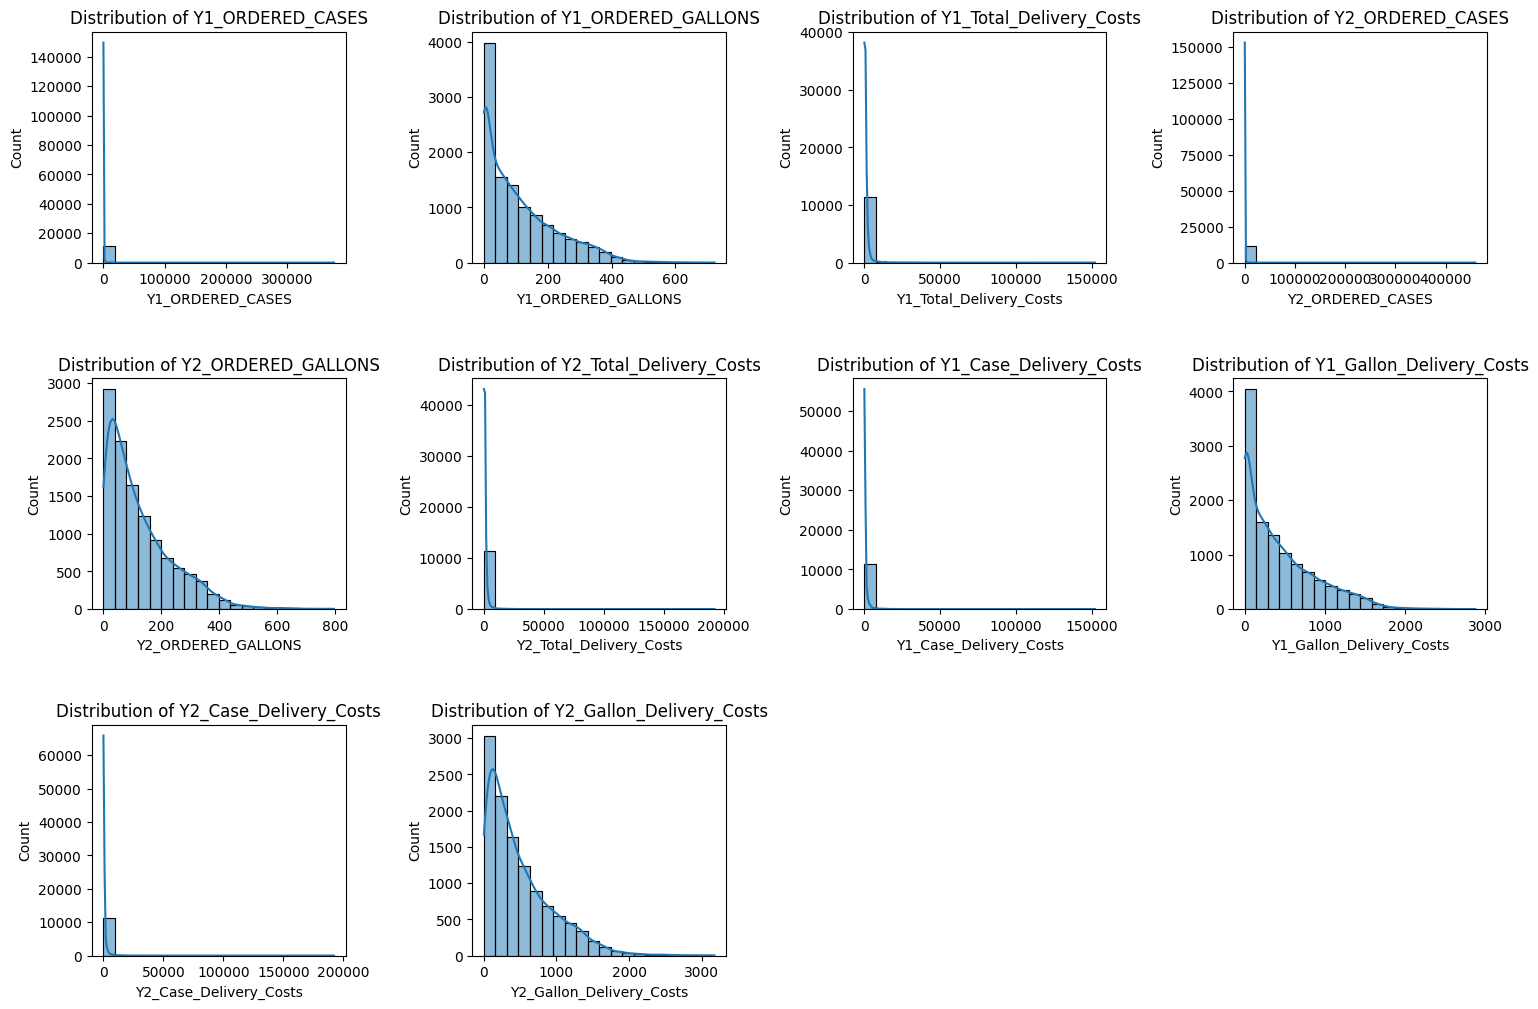

In [ ]:
# Set figure size
plt.figure(figsize=(18, 12))

# List of new columns to plot
columns_to_plot = [
    'Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS', 'Y1_Total_Delivery_Costs',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS', 'Y2_Total_Delivery_Costs',
    'Y1_Case_Delivery_Costs', 'Y1_Gallon_Delivery_Costs', 'Y2_Case_Delivery_Costs',
    'Y2_Gallon_Delivery_Costs'
]

# Loop through columns and create subplots
n = 0
for x in columns_to_plot:
    n += 1
    plt.subplot(3, 4, n)  # Adjust to 2 rows, 5 columns layout
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(local_market_partner_true_filtered[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.show()

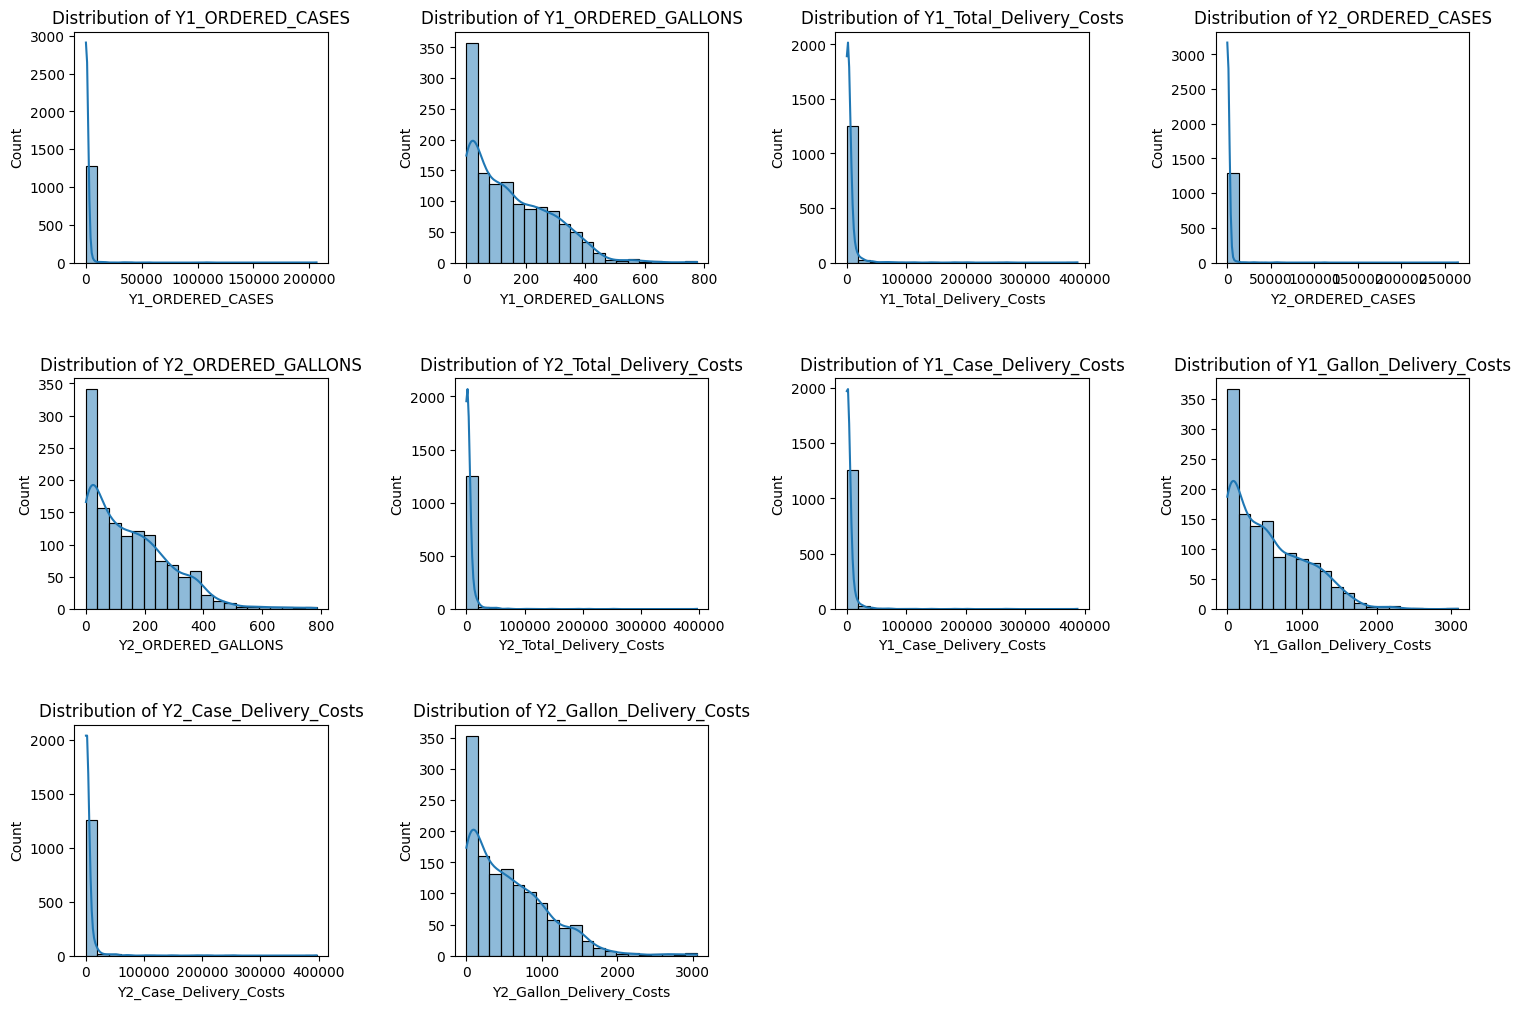

In [ ]:
# Set figure size
plt.figure(figsize=(18, 12))

# List of new columns to plot
columns_to_plot = [
    'Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS', 'Y1_Total_Delivery_Costs',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS', 'Y2_Total_Delivery_Costs',
    'Y1_Case_Delivery_Costs', 'Y1_Gallon_Delivery_Costs', 'Y2_Case_Delivery_Costs',
    'Y2_Gallon_Delivery_Costs'
]

# Loop through columns and create subplots
n = 0
for x in columns_to_plot:
    n += 1
    plt.subplot(3, 4, n)  # Adjust to 2 rows, 5 columns layout
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(local_market_partner_false_filtered[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.show()

This previously has a df inputed again and lost filtered values of <400 and >0

In [ ]:
# Split data based on LOCAL_MARKET_PARTNER
local_market_partner_true = filtered_df[filtered_df['LOCAL_MARKET_PARTNER'] == True]
local_market_partner_false = filtered_df[filtered_df['LOCAL_MARKET_PARTNER'] == False]

# Further split by CO2_CUSTOMER
local_co2_true = local_market_partner_true[local_market_partner_true['CO2_CUSTOMER'] == True]
local_co2_false = local_market_partner_true[local_market_partner_true['CO2_CUSTOMER'] == False]
nonlocal_co2_true = local_market_partner_false[local_market_partner_false['CO2_CUSTOMER'] == True]
nonlocal_co2_false = local_market_partner_false[local_market_partner_false['CO2_CUSTOMER'] == False]

# Display the split datasets
display(local_co2_true)
display(local_co2_false)
display(nonlocal_co2_true)
display(nonlocal_co2_false)

,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
0,160.000000,210.0,1173.051712,601.677100,1774.728812,232.5,151.0,843.480040,874.312036,1717.792077,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
3,125.000000,0.0,0.000000,470.060235,470.060235,147.5,0.0,0.000000,554.671077,554.671077,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,42252,42252,"42252,Jetson,Kentucky,KY,Butler,31,37.2483,-86...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
5,250.000000,75.0,643.911184,995.579891,1639.491076,252.5,48.0,412.103158,1005.535690,1417.638848,...,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1245,1245,"01245,Monterey,Massachusetts,MA,Berkshire,3,42...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
8,235.000000,153.0,1313.578816,935.845098,2249.423914,92.5,36.5,313.370110,368.364560,681.734669,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,True,66710,66710,"66710,Altoona,Kansas,KS,Wilson,205,37.5197,-95...",1,DINING.FAST CASUAL DINING.MEXICAN FAST FOOD.Tr...,0-400
13,25.000000,0.0,0.000000,99.557989,99.557989,7.5,0.0,0.000000,29.867397,29.867397,...,COMPREHENSIVE DINING,FSR - MISC,True,True,67437,67437,"67437,Downs,Kansas,KS,Osborne,141,39.5028,-98....",1,DINING.COMPREHENSIVE DINING.FSR - MISC.True.True,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30296,110.000000,264.0,1558.408126,410.477003,1968.885129,115.0,261.0,1540.698943,429.135049,1969.833992,...,EDUCATION,NON-RESTAURANT EDUCATION,True,True,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1,PUBLIC SECTOR.EDUCATION.NON-RESTAURANT EDUCATI...,0-400
30307,207.913284,179.0,1536.801360,827.977139,2364.778499,127.5,148.5,1274.944145,507.745745,1782.689889,...,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
30309,105.000000,4.0,34.341930,418.143554,452.485484,92.5,6.0,51.512895,368.364560,419.877455,...,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...,0-400
30310,87.500000,91.5,785.571645,348.452962,1134.024607,70.0,93.0,798.449869,278.762370,1077.212238,...,OTHER DINING & BEVERAGE,OTHER DINING,True,True,2646,2646,"02646,Harwich Port,Massachusetts,MA,Barnstable...",1,DINING.OTHER DINING & BEVERAGE.OTHER DINING.Tr...,0-400


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
12,60.000000,0.0,0.000000,238.939174,238.939174,30.000000,0.0,0.000000,119.469587,119.469587,...,COMPREHENSIVE DINING,FSR - MISC,True,False,20751,20751,"20751,Deale,Maryland,MD,Anne Arundel,3,38.7829...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.True.False,0-400
16,116.484032,13.0,111.611272,463.876640,575.487912,102.085512,7.0,60.098377,406.537132,466.635509,...,FAST CASUAL DINING,OTHER FAST FOOD,True,False,1373,1373,"01373,South Deerfield,Massachusetts,MA,Frankli...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
24,115.000000,1220.0,10474.288598,457.966750,10932.255348,0.000000,160.0,1373.677193,0.000000,1373.677193,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,False,20723,20723,"20723,Laurel,Maryland,MD,Howard,27,39.1208,-76...",1,DINING.FAST CASUAL DINING.MEXICAN FAST FOOD.Tr...,0-400
32,180.000000,0.0,0.000000,716.817522,716.817522,160.000000,0.0,0.000000,637.171130,637.171130,...,OTHER DINING & BEVERAGE,OTHER DINING,True,False,21788,21788,"21788,Thurmont,Maryland,MD,Frederick,21,39.610...",1,DINING.OTHER DINING & BEVERAGE.OTHER DINING.Tr...,0-400
70,87.500000,0.0,0.000000,348.452962,348.452962,37.500000,0.5,4.292741,149.336984,153.629725,...,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,20612,20612,"20612,Benedict,Maryland,MD,Charles,17,38.5093,...",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30271,266.009010,127.5,1094.649013,1059.332885,2153.981898,257.757632,95.0,815.620833,1026.473261,1842.094094,...,COMPREHENSIVE DINING,FSR - MISC,True,False,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.True.False,0-400
30281,220.000000,58.0,497.957983,876.110304,1374.068287,267.500000,57.0,489.372500,1065.270484,1554.642984,...,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,2332,2332,"02332,Duxbury,Massachusetts,MA,Plymouth,23,42....",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...,0-400
30299,105.000000,0.0,0.000000,418.143554,418.143554,52.500000,0.0,0.000000,209.071777,209.071777,...,FAST CASUAL DINING,SANDWICH FAST FOOD,True,False,42064,42064,"42064,Marion,Kentucky,KY,Crittenden,55,37.3254...",1,DINING.FAST CASUAL DINING.SANDWICH FAST FOOD.T...,0-400
30301,80.000000,203.5,1747.145680,318.585565,2065.731245,0.000000,187.5,1609.777961,0.000000,1609.777961,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,False,21032,21032,"21032,Crownsville,Maryland,MD,Anne Arundel,3,3...",1,DINING.FAST CASUAL DINING.MEXICAN FAST FOOD.Tr...,0-400


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
28,185.000000,0.000000,0.000000,690.347688,690.347688,200.000000,0.0,0.000000,746.321824,746.321824,...,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,False,True,1226,1226,"01226,Dalton,Massachusetts,MA,Berkshire,3,42.4...",1,PUBLIC SECTOR.PUBLIC SECTOR (NON-MILITARY).OTH...,0-400
44,320.000000,0.000000,0.000000,911.351708,911.351708,162.500000,0.0,0.000000,460.840636,460.840636,...,GENERAL,COMPREHENSIVE PROVIDER,False,True,67862,67862,"67862,Manter,Kansas,KS,Stanton,187,37.5451,-10...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
92,125.000000,0.000000,0.000000,497.789946,497.789946,182.500000,0.0,0.000000,726.773321,726.773321,...,COMPREHENSIVE DINING,FSR - MISC,False,True,21664,21664,"21664,Secretary,Maryland,MD,Dorchester,19,38.6...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.True,0-400
198,190.000000,204.000000,1751.438421,756.640717,2508.079139,207.500000,226.5,1944.611777,826.331310,2770.943086,...,FAST CASUAL DINING,OTHER FAST FOOD,False,True,1608,1608,"01608,Worcester,Massachusetts,MA,Worcester,27,...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
235,50.344416,441.500000,3180.099323,143.379592,3323.478915,67.993319,371.0,2672.291843,193.643211,2865.935054,...,GENERAL,COMPREHENSIVE PROVIDER,False,True,2632,2632,"02632,Centerville,Massachusetts,MA,Barnstable,...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30244,145.000000,868.750000,4866.592593,541.083323,5407.675916,165.000000,887.5,5238.966712,615.715505,5854.682217,...,ACADEMIC INSTITUTION,OTHER ACADEMIC INSTITUTION,False,True,40958,40958,"40958,Kettle Island,Kentucky,KY,Bell,13,36.809...",1,PUBLIC SECTOR.ACADEMIC INSTITUTION.OTHER ACADE...,0-400
30259,127.500000,313.500000,1751.198626,479.461439,2230.660066,80.000000,450.0,2513.682239,300.838550,2814.520789,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,True,40815,40815,"40815,Cawood,Kentucky,KY,Harlan,95,36.7812,-83...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30262,202.211695,0.984372,8.451309,805.271589,813.722898,137.078441,0.0,0.000000,545.890158,545.890158,...,FAST CASUAL DINING,PIZZA FAST FOOD,False,True,42602,42602,"42602,Albany,Kentucky,KY,Clinton,53,36.6857,-8...",1,DINING.FAST CASUAL DINING.PIZZA FAST FOOD.Fals...,0-400
30263,57.500000,252.000000,2163.541579,228.983375,2392.524954,45.000000,170.0,1459.532018,179.204380,1638.736398,...,FAST CASUAL DINING,PIZZA FAST FOOD,False,True,40958,40958,"40958,Kettle Island,Kentucky,KY,Bell,13,36.809...",1,DINING.FAST CASUAL DINING.PIZZA FAST FOOD.Fals...,0-400


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
15,102.500000,1691.5,12183.778040,291.917344,12475.695384,25.00000,1860.5,13401.075403,71.199352,13472.274755,...,GENERAL,COMPREHENSIVE PROVIDER,False,False,40176,40176,"40176,Webster,Kentucky,KY,Breckinridge,27,37.9...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
108,0.000000,329.0,2824.623728,0.000000,2824.623728,10.00000,261.0,2240.810921,39.823196,2280.634117,...,FAST CASUAL DINING,OTHER FAST FOOD,False,False,42364,42364,"42364,Pellville,Kentucky,KY,Hancock,91,37.7523...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
109,5.000000,459.0,3940.736448,19.911598,3960.648046,15.00000,335.0,2876.136623,59.734793,2935.871417,...,FAST CASUAL DINING,OTHER FAST FOOD,False,False,1373,1373,"01373,South Deerfield,Massachusetts,MA,Frankli...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
115,123.908344,7.0,60.098377,493.442623,553.541000,109.99823,12.0,103.025789,438.048103,541.073893,...,FAST CASUAL DINING,OTHER FAST FOOD,False,False,1966,1966,"01966,Rockport,Massachusetts,MA,Essex,9,42.658...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
233,382.500000,1391.0,11218.346066,1203.577693,12421.923760,380.00000,2113.0,17041.240286,1195.711172,18236.951459,...,TRAVEL,OTHER TRAVEL,False,False,2298,2298,"02298,Boston,Massachusetts,MA,Suffolk,25,42.38...",1,WORKPLACE.TRAVEL.OTHER TRAVEL.False.False,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30258,237.500000,748.5,4181.091457,893.114446,5074.205903,230.00000,685.5,3829.175944,864.910832,4694.086776,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,False,66622,66622,"66622,Topeka,Kansas,KS,Shawnee,177,39.0429,-95...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30260,102.500000,538.0,3005.246766,385.449392,3390.696158,65.00000,518.0,2893.527555,244.431322,3137.958877,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,False,1971,1971,"01971,Salem,Massachusetts,MA,Essex,9,42.6354,-...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30261,165.000000,668.5,3734.214615,620.479510,4354.694125,157.50000,567.0,3167.239621,592.275896,3759.515517,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,False,41642,41642,"41642,Ivel,Kentucky,KY,Floyd,71,37.5956,-82.6463",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30264,0.000000,5712.5,41614.646511,0.000000,41614.646511,5.00000,5634.0,43543.628754,16.698449,43560.327203,...,HEALTHCARE,OTHER HEALTHCARE,False,False,66112,66112,"66112,Kansas City,Kansas,KS,Wyandotte,209,39.1...",1,WELLNESS.HEALTHCARE.OTHER HEALTHCARE.False.False,0-400


In [ ]:
# prompt: Remove customer number for all of these new datasets:
# display(local_co2_true)
# display(local_co2_false)
# display(nonlocal_co2_true)
# display(nonlocal_co2_false)

# Remove 'CUSTOMER_NUMBER' column from all datasets
local_co2_true = local_co2_true.drop('CUSTOMER_NUMBER', axis=1, errors='ignore')
local_co2_false = local_co2_false.drop('CUSTOMER_NUMBER', axis=1, errors='ignore')
nonlocal_co2_true = nonlocal_co2_true.drop('CUSTOMER_NUMBER', axis=1, errors='ignore')
nonlocal_co2_false = nonlocal_co2_false.drop('CUSTOMER_NUMBER', axis=1, errors='ignore')

# Display the updated datasets (optional)
display(local_co2_true)
display(local_co2_false)
display(nonlocal_co2_true)
display(nonlocal_co2_false)


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
0,160.000000,210.0,1173.051712,601.677100,1774.728812,232.5,151.0,843.480040,874.312036,1717.792077,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,66508,66508,"66508,Marysville,Kansas,KS,Marshall,117,39.842...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
3,125.000000,0.0,0.000000,470.060235,470.060235,147.5,0.0,0.000000,554.671077,554.671077,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,True,True,42252,42252,"42252,Jetson,Kentucky,KY,Butler,31,37.2483,-86...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
5,250.000000,75.0,643.911184,995.579891,1639.491076,252.5,48.0,412.103158,1005.535690,1417.638848,...,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1245,1245,"01245,Monterey,Massachusetts,MA,Berkshire,3,42...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
8,235.000000,153.0,1313.578816,935.845098,2249.423914,92.5,36.5,313.370110,368.364560,681.734669,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,True,66710,66710,"66710,Altoona,Kansas,KS,Wilson,205,37.5197,-95...",1,DINING.FAST CASUAL DINING.MEXICAN FAST FOOD.Tr...,0-400
13,25.000000,0.0,0.000000,99.557989,99.557989,7.5,0.0,0.000000,29.867397,29.867397,...,COMPREHENSIVE DINING,FSR - MISC,True,True,67437,67437,"67437,Downs,Kansas,KS,Osborne,141,39.5028,-98....",1,DINING.COMPREHENSIVE DINING.FSR - MISC.True.True,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30296,110.000000,264.0,1558.408126,410.477003,1968.885129,115.0,261.0,1540.698943,429.135049,1969.833992,...,EDUCATION,NON-RESTAURANT EDUCATION,True,True,2025,2025,"02025,Cohasset,Massachusetts,MA,Norfolk,21,42....",1,PUBLIC SECTOR.EDUCATION.NON-RESTAURANT EDUCATI...,0-400
30307,207.913284,179.0,1536.801360,827.977139,2364.778499,127.5,148.5,1274.944145,507.745745,1782.689889,...,FAST CASUAL DINING,OTHER FAST FOOD,True,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
30309,105.000000,4.0,34.341930,418.143554,452.485484,92.5,6.0,51.512895,368.364560,419.877455,...,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,True,1441,1441,"01441,Westminster,Massachusetts,MA,Worcester,2...",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...,0-400
30310,87.500000,91.5,785.571645,348.452962,1134.024607,70.0,93.0,798.449869,278.762370,1077.212238,...,OTHER DINING & BEVERAGE,OTHER DINING,True,True,2646,2646,"02646,Harwich Port,Massachusetts,MA,Barnstable...",1,DINING.OTHER DINING & BEVERAGE.OTHER DINING.Tr...,0-400


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
12,60.000000,0.0,0.000000,238.939174,238.939174,30.000000,0.0,0.000000,119.469587,119.469587,...,COMPREHENSIVE DINING,FSR - MISC,True,False,20751,20751,"20751,Deale,Maryland,MD,Anne Arundel,3,38.7829...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.True.False,0-400
16,116.484032,13.0,111.611272,463.876640,575.487912,102.085512,7.0,60.098377,406.537132,466.635509,...,FAST CASUAL DINING,OTHER FAST FOOD,True,False,1373,1373,"01373,South Deerfield,Massachusetts,MA,Frankli...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.True...,0-400
24,115.000000,1220.0,10474.288598,457.966750,10932.255348,0.000000,160.0,1373.677193,0.000000,1373.677193,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,False,20723,20723,"20723,Laurel,Maryland,MD,Howard,27,39.1208,-76...",1,DINING.FAST CASUAL DINING.MEXICAN FAST FOOD.Tr...,0-400
32,180.000000,0.0,0.000000,716.817522,716.817522,160.000000,0.0,0.000000,637.171130,637.171130,...,OTHER DINING & BEVERAGE,OTHER DINING,True,False,21788,21788,"21788,Thurmont,Maryland,MD,Frederick,21,39.610...",1,DINING.OTHER DINING & BEVERAGE.OTHER DINING.Tr...,0-400
70,87.500000,0.0,0.000000,348.452962,348.452962,37.500000,0.5,4.292741,149.336984,153.629725,...,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,20612,20612,"20612,Benedict,Maryland,MD,Charles,17,38.5093,...",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30271,266.009010,127.5,1094.649013,1059.332885,2153.981898,257.757632,95.0,815.620833,1026.473261,1842.094094,...,COMPREHENSIVE DINING,FSR - MISC,True,False,1243,1243,"01243,Middlefield,Massachusetts,MA,Hampshire,1...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.True.False,0-400
30281,220.000000,58.0,497.957983,876.110304,1374.068287,267.500000,57.0,489.372500,1065.270484,1554.642984,...,LICENSED HOSPITALITY,OTHER LICENSED HOSPITALITY,True,False,2332,2332,"02332,Duxbury,Massachusetts,MA,Plymouth,23,42....",1,DINING.LICENSED HOSPITALITY.OTHER LICENSED HOS...,0-400
30299,105.000000,0.0,0.000000,418.143554,418.143554,52.500000,0.0,0.000000,209.071777,209.071777,...,FAST CASUAL DINING,SANDWICH FAST FOOD,True,False,42064,42064,"42064,Marion,Kentucky,KY,Crittenden,55,37.3254...",1,DINING.FAST CASUAL DINING.SANDWICH FAST FOOD.T...,0-400
30301,80.000000,203.5,1747.145680,318.585565,2065.731245,0.000000,187.5,1609.777961,0.000000,1609.777961,...,FAST CASUAL DINING,MEXICAN FAST FOOD,True,False,21032,21032,"21032,Crownsville,Maryland,MD,Anne Arundel,3,3...",1,DINING.FAST CASUAL DINING.MEXICAN FAST FOOD.Tr...,0-400


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
28,185.000000,0.000000,0.000000,690.347688,690.347688,200.000000,0.0,0.000000,746.321824,746.321824,...,PUBLIC SECTOR (NON-MILITARY),OTHER PUBLIC SECTOR,False,True,1226,1226,"01226,Dalton,Massachusetts,MA,Berkshire,3,42.4...",1,PUBLIC SECTOR.PUBLIC SECTOR (NON-MILITARY).OTH...,0-400
44,320.000000,0.000000,0.000000,911.351708,911.351708,162.500000,0.0,0.000000,460.840636,460.840636,...,GENERAL,COMPREHENSIVE PROVIDER,False,True,67862,67862,"67862,Manter,Kansas,KS,Stanton,187,37.5451,-10...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
92,125.000000,0.000000,0.000000,497.789946,497.789946,182.500000,0.0,0.000000,726.773321,726.773321,...,COMPREHENSIVE DINING,FSR - MISC,False,True,21664,21664,"21664,Secretary,Maryland,MD,Dorchester,19,38.6...",1,DINING.COMPREHENSIVE DINING.FSR - MISC.False.True,0-400
198,190.000000,204.000000,1751.438421,756.640717,2508.079139,207.500000,226.5,1944.611777,826.331310,2770.943086,...,FAST CASUAL DINING,OTHER FAST FOOD,False,True,1608,1608,"01608,Worcester,Massachusetts,MA,Worcester,27,...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
235,50.344416,441.500000,3180.099323,143.379592,3323.478915,67.993319,371.0,2672.291843,193.643211,2865.935054,...,GENERAL,COMPREHENSIVE PROVIDER,False,True,2632,2632,"02632,Centerville,Massachusetts,MA,Barnstable,...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30244,145.000000,868.750000,4866.592593,541.083323,5407.675916,165.000000,887.5,5238.966712,615.715505,5854.682217,...,ACADEMIC INSTITUTION,OTHER ACADEMIC INSTITUTION,False,True,40958,40958,"40958,Kettle Island,Kentucky,KY,Bell,13,36.809...",1,PUBLIC SECTOR.ACADEMIC INSTITUTION.OTHER ACADE...,0-400
30259,127.500000,313.500000,1751.198626,479.461439,2230.660066,80.000000,450.0,2513.682239,300.838550,2814.520789,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,True,40815,40815,"40815,Cawood,Kentucky,KY,Harlan,95,36.7812,-83...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30262,202.211695,0.984372,8.451309,805.271589,813.722898,137.078441,0.0,0.000000,545.890158,545.890158,...,FAST CASUAL DINING,PIZZA FAST FOOD,False,True,42602,42602,"42602,Albany,Kentucky,KY,Clinton,53,36.6857,-8...",1,DINING.FAST CASUAL DINING.PIZZA FAST FOOD.Fals...,0-400
30263,57.500000,252.000000,2163.541579,228.983375,2392.524954,45.000000,170.0,1459.532018,179.204380,1638.736398,...,FAST CASUAL DINING,PIZZA FAST FOOD,False,True,40958,40958,"40958,Kettle Island,Kentucky,KY,Bell,13,36.809...",1,DINING.FAST CASUAL DINING.PIZZA FAST FOOD.Fals...,0-400


,Y1_ORDERED_GALLONS,Y1_ORDERED_CASES,Y1_Case_Delivery_Costs,Y1_Gallon_Delivery_Costs,Y1_Total_Delivery_Costs,Y2_ORDERED_GALLONS,Y2_ORDERED_CASES,Y2_Case_Delivery_Costs,Y2_Gallon_Delivery_Costs,Y2_Total_Delivery_Costs,...,TRADE_CHANNEL,SUB_TRADE_CHANNEL,LOCAL_MARKET_PARTNER,CO2_CUSTOMER,ZIP_CODE,zip,full address,Has Primary Group Number?,Customer_Profile,Gallon_Bin
15,102.500000,1691.5,12183.778040,291.917344,12475.695384,25.00000,1860.5,13401.075403,71.199352,13472.274755,...,GENERAL,COMPREHENSIVE PROVIDER,False,False,40176,40176,"40176,Webster,Kentucky,KY,Breckinridge,27,37.9...",1,BULK TRADE.GENERAL.COMPREHENSIVE PROVIDER.Fals...,0-400
108,0.000000,329.0,2824.623728,0.000000,2824.623728,10.00000,261.0,2240.810921,39.823196,2280.634117,...,FAST CASUAL DINING,OTHER FAST FOOD,False,False,42364,42364,"42364,Pellville,Kentucky,KY,Hancock,91,37.7523...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
109,5.000000,459.0,3940.736448,19.911598,3960.648046,15.00000,335.0,2876.136623,59.734793,2935.871417,...,FAST CASUAL DINING,OTHER FAST FOOD,False,False,1373,1373,"01373,South Deerfield,Massachusetts,MA,Frankli...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
115,123.908344,7.0,60.098377,493.442623,553.541000,109.99823,12.0,103.025789,438.048103,541.073893,...,FAST CASUAL DINING,OTHER FAST FOOD,False,False,1966,1966,"01966,Rockport,Massachusetts,MA,Essex,9,42.658...",1,DINING.FAST CASUAL DINING.OTHER FAST FOOD.Fals...,0-400
233,382.500000,1391.0,11218.346066,1203.577693,12421.923760,380.00000,2113.0,17041.240286,1195.711172,18236.951459,...,TRAVEL,OTHER TRAVEL,False,False,2298,2298,"02298,Boston,Massachusetts,MA,Suffolk,25,42.38...",1,WORKPLACE.TRAVEL.OTHER TRAVEL.False.False,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30258,237.500000,748.5,4181.091457,893.114446,5074.205903,230.00000,685.5,3829.175944,864.910832,4694.086776,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,False,66622,66622,"66622,Topeka,Kansas,KS,Shawnee,177,39.0429,-95...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30260,102.500000,538.0,3005.246766,385.449392,3390.696158,65.00000,518.0,2893.527555,244.431322,3137.958877,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,False,1971,1971,"01971,Salem,Massachusetts,MA,Essex,9,42.6354,-...",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30261,165.000000,668.5,3734.214615,620.479510,4354.694125,157.50000,567.0,3167.239621,592.275896,3759.515517,...,OUTDOOR ACTIVITIES,OTHER OUTDOOR ACTIVITIES,False,False,41642,41642,"41642,Ivel,Kentucky,KY,Floyd,71,37.5956,-82.6463",1,EVENT.OUTDOOR ACTIVITIES.OTHER OUTDOOR ACTIVIT...,0-400
30264,0.000000,5712.5,41614.646511,0.000000,41614.646511,5.00000,5634.0,43543.628754,16.698449,43560.327203,...,HEALTHCARE,OTHER HEALTHCARE,False,False,66112,66112,"66112,Kansas City,Kansas,KS,Wyandotte,209,39.1...",1,WELLNESS.HEALTHCARE.OTHER HEALTHCARE.False.False,0-400


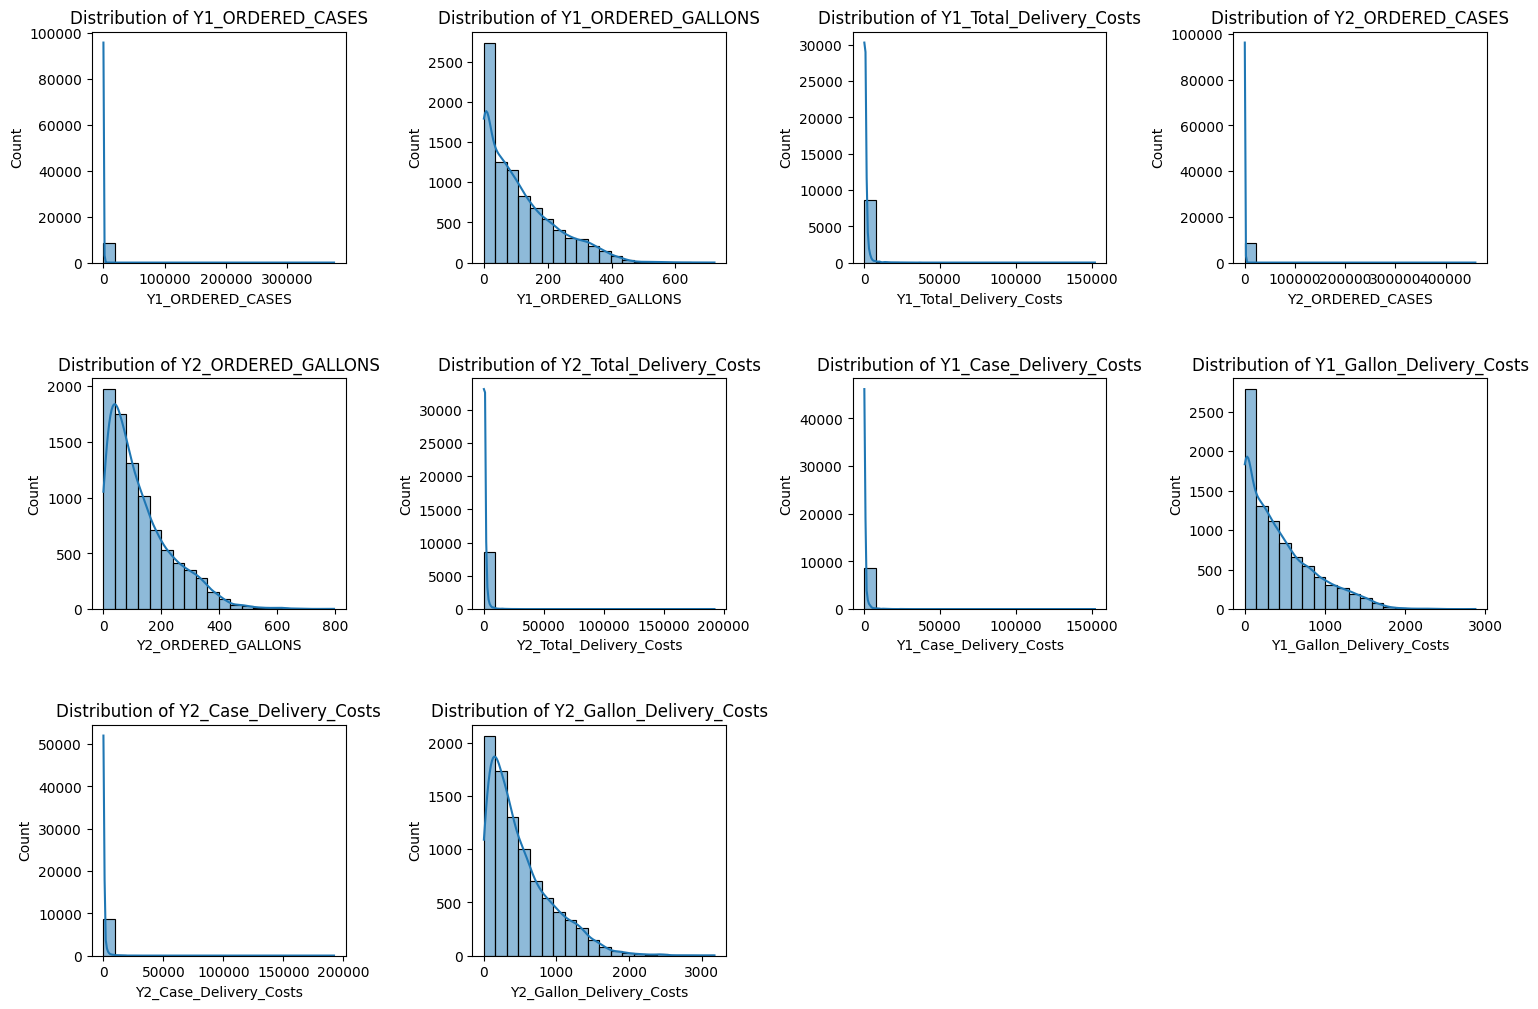

In [ ]:
# display(local_co2_true)
# display(local_co2_false)
# display(nonlocal_co2_true)
# display(nonlocal_co2_false)

# Set figure size
plt.figure(figsize=(18, 12))

# List of new columns to plot
columns_to_plot = [
    'Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS', 'Y1_Total_Delivery_Costs',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS', 'Y2_Total_Delivery_Costs',
    'Y1_Case_Delivery_Costs', 'Y1_Gallon_Delivery_Costs', 'Y2_Case_Delivery_Costs',
    'Y2_Gallon_Delivery_Costs'
]

# Loop through columns and create subplots
n = 0
for x in columns_to_plot:
    n += 1
    plt.subplot(3, 4, n)  # Adjust to 2 rows, 5 columns layout
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(local_co2_true[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.show()

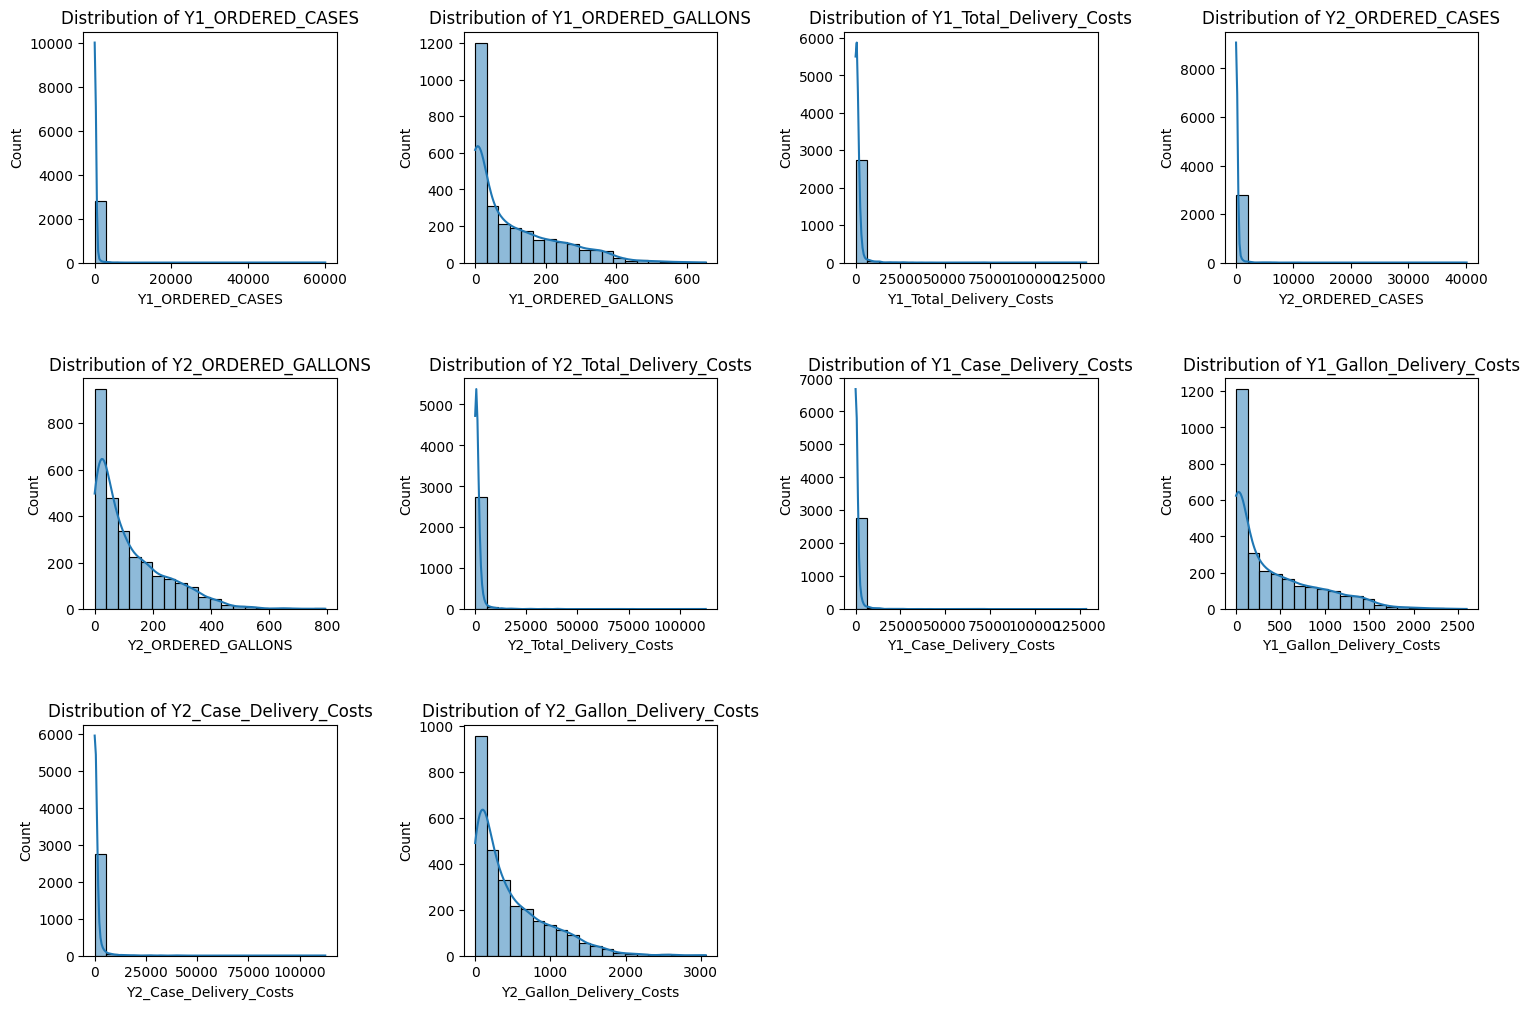

In [ ]:
# display(local_co2_true)
# display(local_co2_false)
# display(nonlocal_co2_true)
# display(nonlocal_co2_false)

# Set figure size
plt.figure(figsize=(18, 12))

# List of new columns to plot
columns_to_plot = [
    'Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS', 'Y1_Total_Delivery_Costs',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS', 'Y2_Total_Delivery_Costs',
    'Y1_Case_Delivery_Costs', 'Y1_Gallon_Delivery_Costs', 'Y2_Case_Delivery_Costs',
    'Y2_Gallon_Delivery_Costs'
]

# Loop through columns and create subplots
n = 0
for x in columns_to_plot:
    n += 1
    plt.subplot(3, 4, n)  # Adjust to 2 rows, 5 columns layout
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(local_co2_false[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.show()

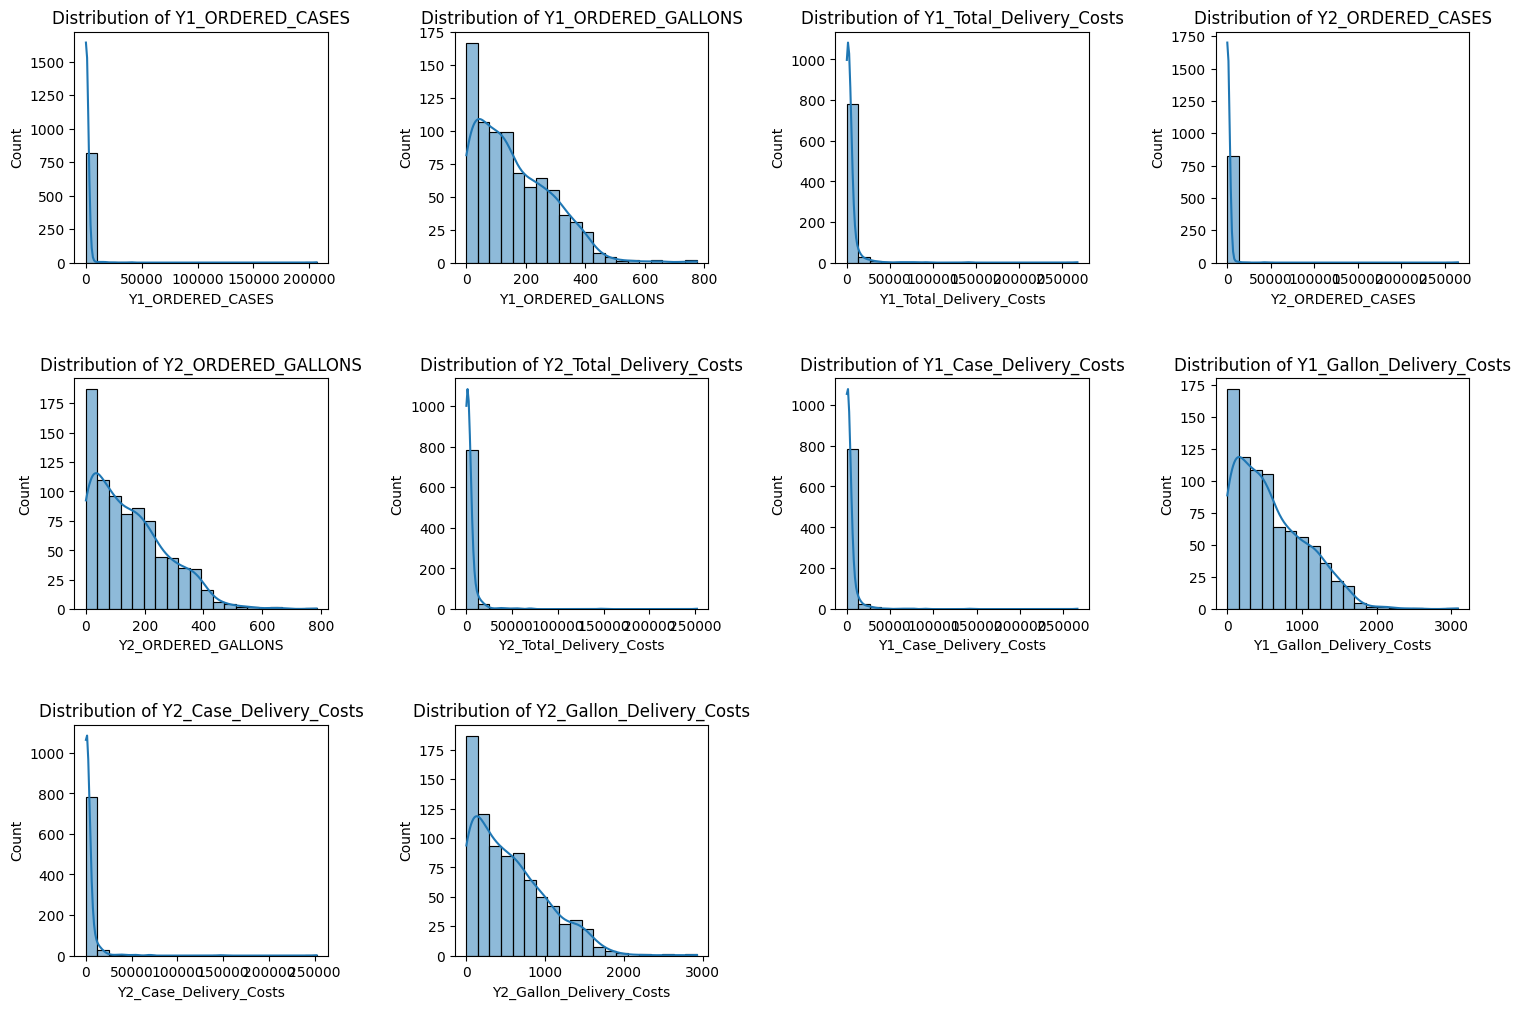

In [ ]:
# display(local_co2_true)
# display(local_co2_false)
# display(nonlocal_co2_true)
# display(nonlocal_co2_false)

# Set figure size
plt.figure(figsize=(18, 12))

# List of new columns to plot
columns_to_plot = [
    'Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS', 'Y1_Total_Delivery_Costs',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS', 'Y2_Total_Delivery_Costs',
    'Y1_Case_Delivery_Costs', 'Y1_Gallon_Delivery_Costs', 'Y2_Case_Delivery_Costs',
    'Y2_Gallon_Delivery_Costs'
]

# Loop through columns and create subplots
n = 0
for x in columns_to_plot:
    n += 1
    plt.subplot(3, 4, n)  # Adjust to 2 rows, 5 columns layout
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(nonlocal_co2_true[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.show()

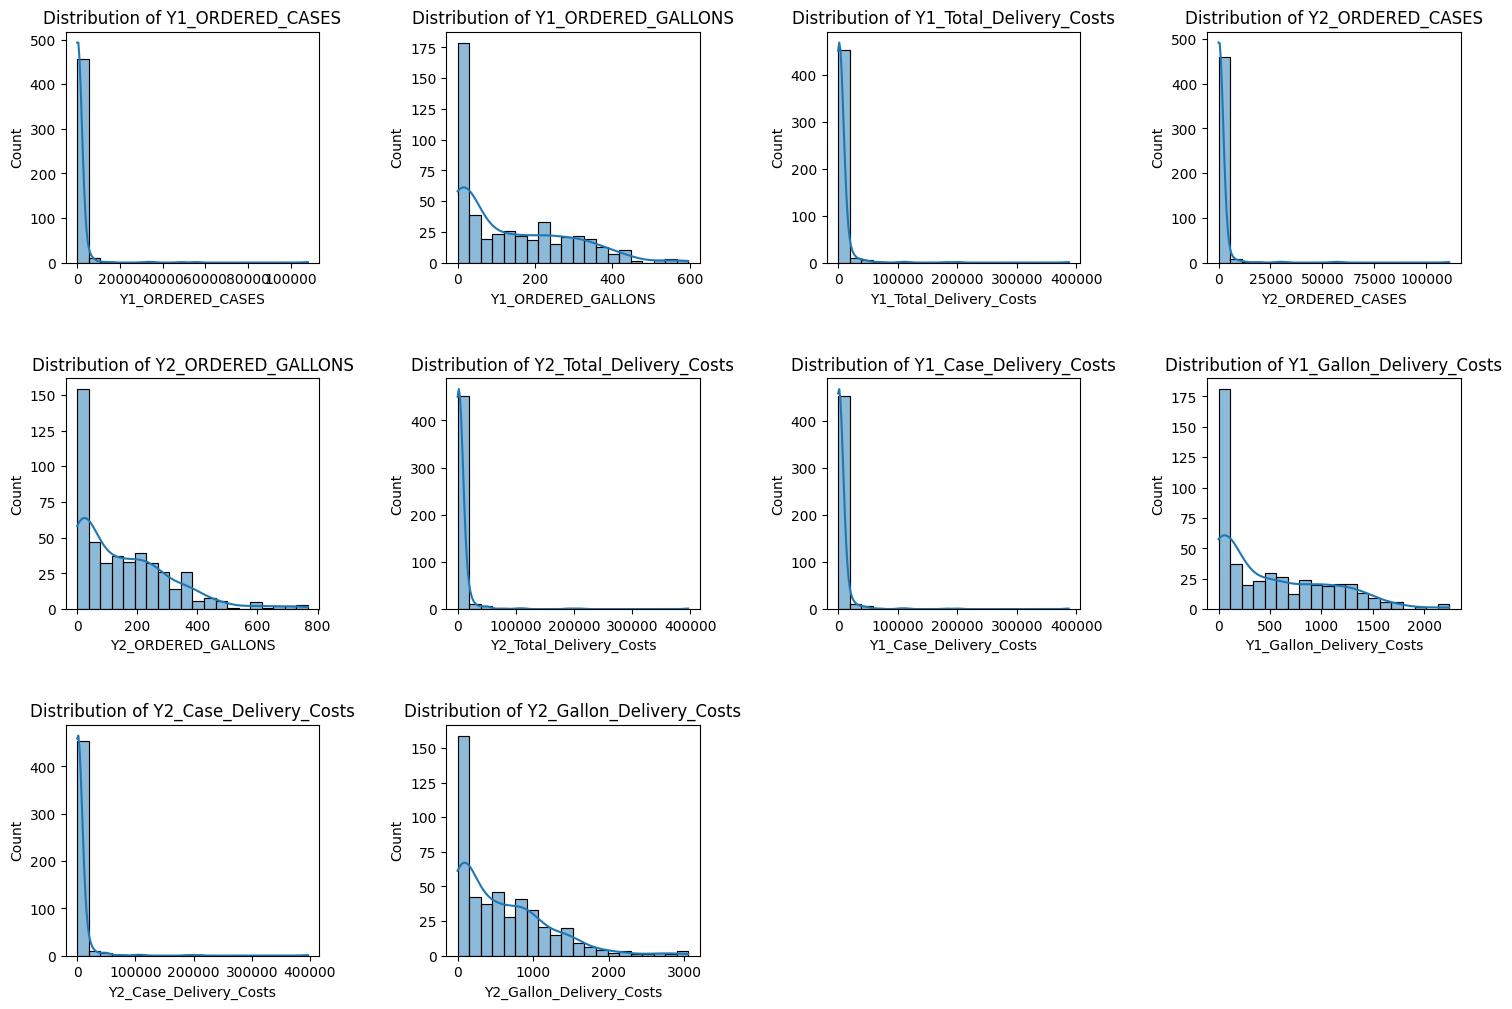

In [ ]:
# display(local_co2_true)
# display(local_co2_false)
# display(nonlocal_co2_true)
# display(nonlocal_co2_false)

# Set figure size
plt.figure(figsize=(18, 12))

# List of new columns to plot
columns_to_plot = [
    'Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS', 'Y1_Total_Delivery_Costs',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS', 'Y2_Total_Delivery_Costs',
    'Y1_Case_Delivery_Costs', 'Y1_Gallon_Delivery_Costs', 'Y2_Case_Delivery_Costs',
    'Y2_Gallon_Delivery_Costs'
]

# Loop through columns and create subplots
n = 0
for x in columns_to_plot:
    n += 1
    plt.subplot(3, 4, n)  # Adjust to 2 rows, 5 columns layout
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(nonlocal_co2_false[x], bins=20, kde=True)
    plt.title(f'Distribution of {x}')

plt.show()

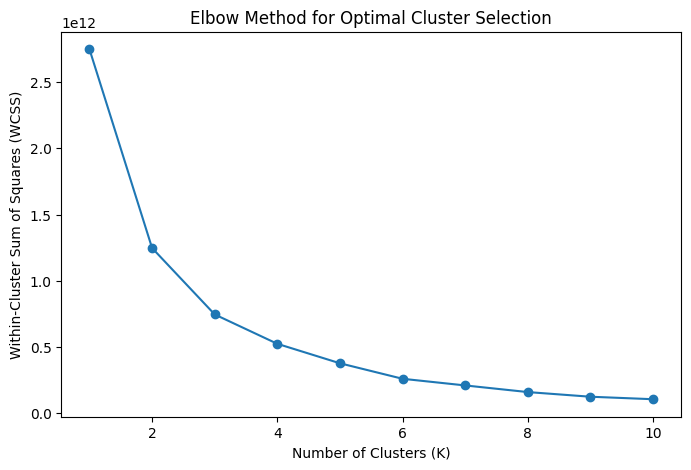

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for clustering
X = filtered_df.loc[:, ['Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS', 'Y1_Total_Delivery_Costs',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS', 'Y2_Total_Delivery_Costs',
    'Y1_Case_Delivery_Costs', 'Y1_Gallon_Delivery_Costs', 'Y2_Case_Delivery_Costs',
    'Y2_Gallon_Delivery_Costs']].values

# Determine the optimal number of clusters using the Elbow Method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to cluster centers

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Cluster Selection")
plt.show()

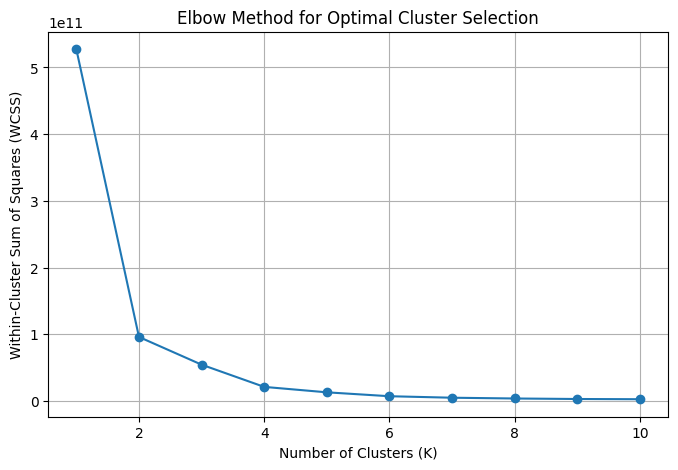

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define your numerical columns
X_num = filtered_df[[
    'Y1_ORDERED_CASES', 'Y1_ORDERED_GALLONS',
    'Y2_ORDERED_CASES', 'Y2_ORDERED_GALLONS'
]]

# Step 2: Group rare Customer Profiles
profile_counts = filtered_df['Customer_Profile'].value_counts()
top_profiles = profile_counts[profile_counts > 50].index

filtered_df['Customer_Profile_Grouped'] = filtered_df['Customer_Profile'].apply(
    lambda x: x if x in top_profiles else 'Other'
)

# Step 3: One-hot encode the grouped Customer Profile
encoded_profile = pd.get_dummies(filtered_df['Customer_Profile_Grouped'], prefix='Profile')

# Step 4: Combine numerical features and encoded categorical features
X_combined = pd.concat([X_num, encoded_profile], axis=1)
X = X_combined.values  # Convert to numpy array

# Step 5: Elbow method to find optimal K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 6: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal Cluster Selection")
plt.grid(True)
plt.show()


Optimal clusters are 4

In [ ]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X)

print(label)

[0 0 0 ... 0 0 0]


In [ ]:
print(kmeans.cluster_centers_)

[[ 1.22902901e+02  1.13516881e+02  1.26781998e+02  1.28203710e+02
   4.14483460e-03  7.03839837e-03  5.70892313e-03  1.43114100e-02
   1.08704153e-02  6.09994526e-03  5.31790099e-03  8.99350903e-03
   5.20841480e-02  1.77993274e-01  5.08328771e-03  2.97176820e-02
   7.89864706e-03  4.06663017e-03  1.40767967e-02  5.54469383e-02
   8.13326034e-03  1.18870728e-02  3.89458043e-02  8.21146477e-03
   1.43896145e-02  5.63071870e-03  4.28560257e-02  5.89661375e-02
   4.45765230e-03  3.13599750e-02  1.00570892e-01  5.16149214e-03
   1.14178463e-02  3.81637601e-02  5.31790099e-03  5.31790099e-03
   4.30124345e-03  6.49096739e-03  6.17814968e-03  9.30632674e-03
   1.06279815e-01  4.37944788e-03  9.54094002e-03  5.86533198e-03
   1.18870728e-02  4.84867443e-03  3.12817705e-02]
 [ 2.06637000e+05  6.52500000e+02  2.64725000e+05  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000

In [ ]:
print(filtered_df.columns)  # Check for 'Cluster'


Index(['Y1_ORDERED_GALLONS', 'Y1_ORDERED_CASES', 'Y1_Case_Delivery_Costs',
       'Y1_Gallon_Delivery_Costs', 'Y1_Total_Delivery_Costs',
       'Y2_ORDERED_GALLONS', 'Y2_ORDERED_CASES', 'Y2_Case_Delivery_Costs',
       'Y2_Gallon_Delivery_Costs', 'Y2_Total_Delivery_Costs',
       'FREQUENT_ORDER_TYPE', 'FIRST_DELIVERY_DATE', 'ON_BOARDING_DATE',
       'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL',
       'LOCAL_MARKET_PARTNER', 'CO2_CUSTOMER', 'ZIP_CODE', 'zip',
       'full address', 'Has Primary Group Number?', 'Customer_Profile',
       'Gallon_Bin', 'Customer_Profile_Grouped'],
      dtype='object')


In [ ]:
# Create 'Partner_CO2_Group' column (if you haven't already)
filtered_df['Partner_CO2_Group'] = (
    filtered_df['LOCAL_MARKET_PARTNER'].apply(lambda x: 'LMP' if x else 'non-LMP') + "_" +
    filtered_df['CO2_CUSTOMER'].apply(lambda x: 'CO2' if x else 'non-CO2')
)

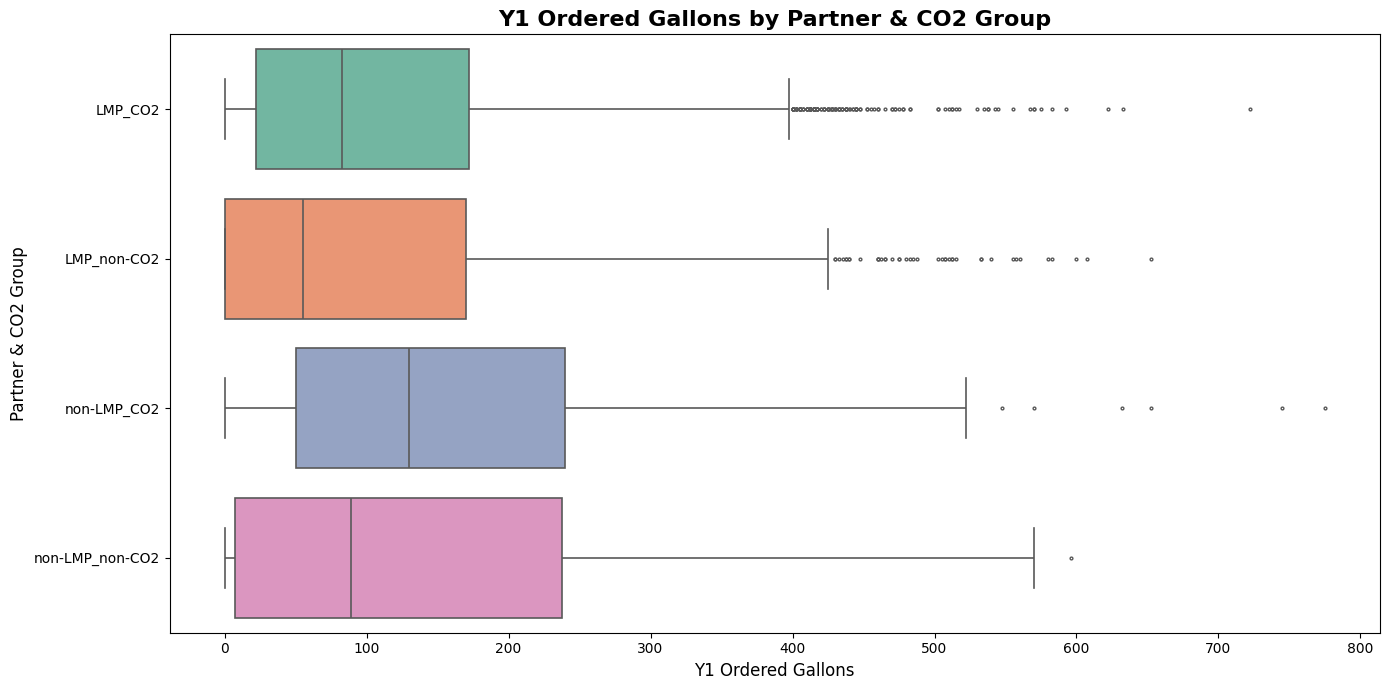

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Order the groups manually if you want a logical flow
order = ['LMP_CO2', 'LMP_non-CO2', 'non-LMP_CO2', 'non-LMP_non-CO2']

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=filtered_df,
    x='Y1_ORDERED_GALLONS',
    y='Partner_CO2_Group',
    order=order,
    palette='Set2',
    linewidth=1.2,
    fliersize=2
)

plt.title('Y1 Ordered Gallons by Partner & CO2 Group', fontsize=16, weight='bold')
plt.xlabel('Y1 Ordered Gallons', fontsize=12)
plt.ylabel('Partner & CO2 Group', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Define the binary target variable
filtered_df['low_volume_flag'] = (filtered_df['Y2_ORDERED_GALLONS'] < 400).astype(int)

# 2. Drop columns that leak info about the target
leakage_cols = [
    'low_volume_flag',
    'Y2_ORDERED_GALLONS',  # leaks target
    'Y2_Gallon_Delivery_Costs',
    'Y2_Case_Delivery_Costs',
    'Y2_Total_Delivery_Costs'
]

X = filtered_df.drop(columns=leakage_cols, errors='ignore')

# Remove high-cardinality or non-numeric data (e.g., zip code, full address)
X = X.select_dtypes(include='number')

# 3. Target
y = filtered_df['low_volume_flag']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 5. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 7. Predict and evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9706
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.97      1.00      0.99      3106

    accuracy                           0.97      3200
   macro avg       0.49      0.50      0.49      3200
weighted avg       0.94      0.97      0.96      3200



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Create the binary target variable
filtered_df['high_volume_flag'] = (filtered_df['Y2_ORDERED_GALLONS'] >= 350).astype(int)

# Step 2: Pick only categorical or boolean-like columns
cat_cols = [
    'SUB_TRADE_CHANNEL',
    'LOCAL_MARKET_PARTNER',
    'CO2_CUSTOMER',
    'Has Primary Group Number?',
    'Gallon_Bin',  # even if this is from Y2, it's binned — could be useful
    'Customer_Profile_Grouped'
]

X = filtered_df[cat_cols]
y = filtered_df['high_volume_flag']

# Step 3: One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ],
    remainder='drop'
)

# Step 4: Create a logistic regression pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 6: Fit model
clf.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3021
           1       0.00      0.00      0.00       179

    accuracy                           0.94      3200
   macro avg       0.47      0.50      0.49      3200
weighted avg       0.89      0.94      0.92      3200



In [ ]:
# Predict probabilities instead of just 0/1 labels
y_proba = clf.predict_proba(X)[:, 1]  # Probability of class 1 (high volume)

# Append the score to the original DataFrame
filtered_df['high_volume_score'] = y_proba

# View top customers by score
print(filtered_df[['Y2_ORDERED_GALLONS', 'high_volume_score']].sort_values(by='high_volume_score', ascending=False).head())


       Y2_ORDERED_GALLONS  high_volume_score
4938                 80.0           0.416611
13195               340.0           0.416611
853                 187.5           0.416611
7363                372.5           0.416611
27390               205.0           0.416611


In [ ]:
# Customer performance score
average_high_volume_score = filtered_df['high_volume_score'].mean()
print(f"Average High Volume Score: {average_high_volume_score:.4f}")

Average High Volume Score: 0.0553


# Comparing Ordered Gallons Among Local Market Partners (LMP) and Non-LMP Groups

### **Objective**
We performed a **group-level comparative analysis** of ordered gallons to assess the impact of Local Market Partner (LMP) status on order volume behavior.

#### Key Results
- **LMP customers** ordered an average of **236 gallons/year**, while **non-LMP customers** averaged **142 gallons/year**.
- LMPs had **20% fewer outliers** and more consistent ordering patterns.
- Boxplots showed that the top quartile of LMPs exceeded 400 gallons per year, a key performance benchmark.

#### Business Insight
LMP status is a **strong indicator of volume potential**, and targeting similar profiles or upgrading existing accounts into the LMP program could drive incremental growth.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [ ]:
merged_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Swire Coca Cola/merged_data.csv")

# Display basic information
display(merged_data.head())
display(merged_data.info())

,TRANSACTION_DATE,WEEK,YEAR,CUSTOMER_NUMBER,ORDER_TYPE,ORDERED_CASES,LOADED_CASES,DELIVERED_CASES,ORDERED_GALLONS,LOADED_GALLONS,...,full address,Month,Has Primary Group Number?,ORDERED_CASES_RANGE,ORDERED_GALLONS_RANGE,Delivery_Rate_Cases,Delivery_Rate_Gallons,Case_delivery_costs,Gallon_delivery_costs,Total_delivery_costs
0,2023-01-05,1,2023,501202893,MYCOKE LEGACY,1.0,1.0,1.0,90.0,90.0,...,"66955,Mahaska,Kansas,KS,Washington,201,39.9845...",1,1,0 - 149,0 - 149,8.585482,3.982320,8.585482,358.408761,366.994243
1,2023-01-06,1,2023,500264574,MYCOKE LEGACY,12.5,12.5,12.5,0.0,0.0,...,"41603,Banner,Kentucky,KY,Floyd,71,37.5707,-82....",1,1,0 - 149,0 - 149,8.166289,3.339690,102.078616,0.000000,102.078616
2,2023-01-09,2,2023,501174701,MYCOKE LEGACY,2.0,2.0,2.0,0.0,0.0,...,"01824,Chelmsford,Massachusetts,MA,Middlesex,17...",1,1,0 - 149,0 - 149,8.585482,3.982320,17.170965,0.000000,17.170965
3,2023-01-11,2,2023,600586532,SALES REP,18.0,16.0,16.0,2.5,2.5,...,"01337,Bernardston,Massachusetts,MA,Franklin,11...",1,1,0 - 149,0 - 149,7.202943,2.847974,129.652974,7.119935,136.772909
4,2023-01-17,3,2023,501014325,SALES REP,29.0,29.0,29.0,0.0,0.0,...,"67473,Osborne,Kansas,KS,Osborne,141,39.4194,-9...",1,1,0 - 149,0 - 149,7.325733,4.619765,212.446253,0.000000,212.446253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045540 entries, 0 to 1045539
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   TRANSACTION_DATE           1045540 non-null  object 
 1   WEEK                       1045540 non-null  int64  
 2   YEAR                       1045540 non-null  int64  
 3   CUSTOMER_NUMBER            1045540 non-null  int64  
 4   ORDER_TYPE                 1034409 non-null  object 
 5   ORDERED_CASES              1045540 non-null  float64
 6   LOADED_CASES               1045540 non-null  float64
 7   DELIVERED_CASES            1045540 non-null  float64
 8   ORDERED_GALLONS            1045540 non-null  float64
 9   LOADED_GALLONS             1045540 non-null  float64
 10  DELIVERED_GALLONS          1045540 non-null  float64
 11  PRIMARY_GROUP_NUMBER       554645 non-null   float64
 12  FREQUENT_ORDER_TYPE        1045540 non-null  object 
 13  FIRST_DELIVE

None

In [ ]:
# Check missing values in each column
missing_values = merged_data.isnull().sum()

# Display columns with missing values
display(missing_values[missing_values > 0])


,0
ORDER_TYPE,11131
PRIMARY_GROUP_NUMBER,490895
Delivery_Rate_Cases,1240
Delivery_Rate_Gallons,1240
Case_delivery_costs,1240
Gallon_delivery_costs,1240
Total_delivery_costs,1240


In [ ]:
# Convert TRANSACTION_DATE to datetime (if not already)
merged_data['TRANSACTION_DATE'] = pd.to_datetime(merged_data['TRANSACTION_DATE'])

# Aggregate total gallons per year per customer
customer_gallon_data = merged_data.groupby(['CUSTOMER_NUMBER', 'YEAR']).agg(
    Total_Gallons=('ORDERED_GALLONS', 'sum'),
    Total_Cases=('ORDERED_CASES', 'sum')
).reset_index()

# Since 1 case = 1 gallon, calculate total gallons
customer_gallon_data['Total_Gallons'] += customer_gallon_data['Total_Cases']

# Drop Total_Cases (optional, if we no longer need it)
customer_gallon_data.drop(columns=['Total_Cases'], inplace=True)

# Display the result
display("Customer Gallon Data", customer_gallon_data)


'Customer Gallon Data'

,CUSTOMER_NUMBER,YEAR,Total_Gallons
0,500245678,2023,370.0
1,500245678,2024,383.5
2,500245685,2023,601.5
3,500245685,2024,482.0
4,500245686,2023,17.5
...,...,...,...
55648,600975377,2024,178.5
55649,600975383,2023,54.0
55650,600975383,2024,61.0
55651,600975408,2023,67.0


In [ ]:
# Merge customer gallon data with the main dataset (keeping yearly aggregation)
customer_data = customer_gallon_data.merge(
    merged_data.groupby(['CUSTOMER_NUMBER', 'YEAR']).agg(
        Total_Delivery_Costs=('Total_delivery_costs', 'sum'),
        Order_Frequency=('TRANSACTION_DATE', 'count')
    ).reset_index(),
    on=['CUSTOMER_NUMBER', 'YEAR'],
    how='left'
)

# Compute additional features
customer_data['Avg_Order_Size'] = customer_data['Total_Gallons'] / customer_data['Order_Frequency']
customer_data['Cost_per_Gallon'] = customer_data['Total_Delivery_Costs'] / customer_data['Total_Gallons']

# Handle infinite values & missing values
customer_data.replace([np.inf, -np.inf], np.nan, inplace=True)
customer_data.fillna({'Avg_Order_Size': 0, 'Cost_per_Gallon': customer_data['Cost_per_Gallon'].median()}, inplace=True)


# Display the processed customer dataset
display("Processed Customer Data", customer_data)


'Processed Customer Data'

,CUSTOMER_NUMBER,YEAR,Total_Gallons,Total_Delivery_Costs,Order_Frequency,Avg_Order_Size,Cost_per_Gallon
0,500245678,2023,370.0,1774.728812,27,13.703704,4.796564
1,500245678,2024,383.5,1717.792077,17,22.558824,4.479249
2,500245685,2023,601.5,2505.841128,46,13.076087,4.165987
3,500245685,2024,482.0,2089.795057,17,28.352941,4.335674
4,500245686,2023,17.5,128.200325,5,3.500000,7.325733
...,...,...,...,...,...,...,...
55648,600975377,2024,178.5,1307.643315,18,9.916667,7.325733
55649,600975383,2023,54.0,395.589574,7,7.714286,7.325733
55650,600975383,2024,61.0,446.869704,6,10.166667,7.325733
55651,600975408,2023,67.0,282.985423,6,11.166667,4.223663


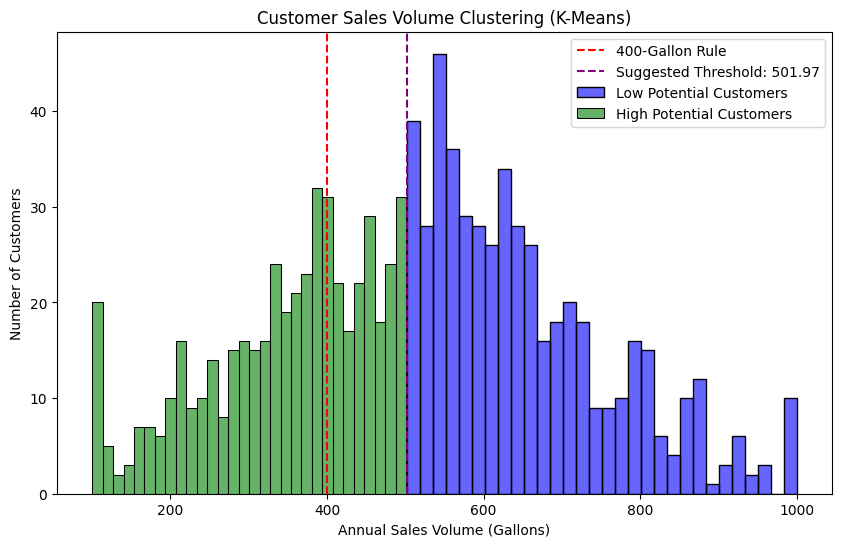

,Total_Gallons
Cluster,
0,656.282853
1,347.656998


In [ ]:
from sklearn.cluster import KMeans

# Simulated customer dataset (since actual dataset is unavailable)
# Replace this with actual dataset when running the analysis
np.random.seed(42)
simulated_gallons = np.random.normal(loc=500, scale=200, size=1000)  # Simulating sales volume
simulated_gallons = np.clip(simulated_gallons, 100, 1000)  # Restricting range

# Convert to DataFrame
df = pd.DataFrame({"Total_Gallons": simulated_gallons})

# Apply K-Means Clustering (2 clusters: Low & High potential customers)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[["Total_Gallons"]])

# Find the mean of each cluster (this helps determine the natural threshold)
cluster_means = df.groupby("Cluster")["Total_Gallons"].mean()
optimal_threshold = cluster_means.mean()  # Midpoint between cluster means

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Cluster"] == 0]["Total_Gallons"], bins=30, color="blue", label="Low Potential Customers", alpha=0.6)
sns.histplot(df[df["Cluster"] == 1]["Total_Gallons"], bins=30, color="green", label="High Potential Customers", alpha=0.6)
plt.axvline(x=400, color="red", linestyle="--", label="400-Gallon Rule")
plt.axvline(x=optimal_threshold, color="purple", linestyle="--", label=f"Suggested Threshold: {optimal_threshold:.2f}")

# Labels and title
plt.xlabel("Annual Sales Volume (Gallons)")
plt.ylabel("Number of Customers")
plt.title("Customer Sales Volume Clustering (K-Means)")
plt.legend()
plt.show()

# Display Cluster Means
cluster_means


>Using K-Means Clustering, we identified two natural customer groups:
Low Potential Customers (Cluster 1)
Average annual sales volume: ~347.66 gallonsIncludes smaller customers who might benefit from White Truck (ARTM) delivery.

>High Potential Customers (Cluster 0)
Average annual sales volume: ~656.28 gallons
These customers should likely remain in Red Truck (Direct Delivery).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define target variables based on 400-gallon and 500-gallon thresholds
df["Above_400"] = (df["Total_Gallons"] >= 400).astype(int)
df["Above_500"] = (df["Total_Gallons"] >= 500).astype(int)

# Select features (excluding Total_Gallons for now to avoid bias)
features = ["Total_Gallons"]  # Ideally, add other features like cost, frequency

# Train-test split for both thresholds
X_train_400, X_test_400, y_train_400, y_test_400 = train_test_split(df[features], df["Above_400"], test_size=0.2, random_state=42)
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split(df[features], df["Above_500"], test_size=0.2, random_state=42)

# Initialize models
log_reg_400 = LogisticRegression()
log_reg_500 = LogisticRegression()
dt_400 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_500 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train models
log_reg_400.fit(X_train_400, y_train_400)
log_reg_500.fit(X_train_500, y_train_500)
dt_400.fit(X_train_400, y_train_400)
dt_500.fit(X_train_500, y_train_500)

# Predictions
y_pred_log_400 = log_reg_400.predict(X_test_400)
y_pred_log_500 = log_reg_500.predict(X_test_500)
y_pred_dt_400 = dt_400.predict(X_test_400)
y_pred_dt_500 = dt_500.predict(X_test_500)

# Evaluate Performance
results = {
    "Threshold": ["400 Gallons", "400 Gallons", "500 Gallons", "500 Gallons"],
    "Model": ["Logistic Regression", "Decision Tree", "Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test_400, y_pred_log_400),
        accuracy_score(y_test_400, y_pred_dt_400),
        accuracy_score(y_test_500, y_pred_log_500),
        accuracy_score(y_test_500, y_pred_dt_500),
    ],
    "AUC-ROC": [
        roc_auc_score(y_test_400, log_reg_400.predict_proba(X_test_400)[:, 1]),
        roc_auc_score(y_test_400, dt_400.predict_proba(X_test_400)[:, 1]),
        roc_auc_score(y_test_500, log_reg_500.predict_proba(X_test_500)[:, 1]),
        roc_auc_score(y_test_500, dt_500.predict_proba(X_test_500)[:, 1]),
    ]
}

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
display("Threshold Analysis Results", results_df)


'Threshold Analysis Results'

,Threshold,Model,Accuracy,AUC-ROC
0,400 Gallons,Logistic Regression,1.0,1.0
1,400 Gallons,Decision Tree,1.0,1.0
2,500 Gallons,Logistic Regression,1.0,1.0
3,500 Gallons,Decision Tree,1.0,1.0


##  Validate the 500-Gallon Threshold Using Predictive Modeling

In [ ]:
# Filter customers below 500 gallons
customers_below_500 = customer_data[customer_data["Total_Gallons"] < 500]

# Calculate total delivery costs for these customers
total_cost_below_500 = customers_below_500["Total_Delivery_Costs"].sum()

print(f"Total Delivery Cost for Customers Below 500 Gallons: ${total_cost_below_500:,.2f}")


Total Delivery Cost for Customers Below 500 Gallons: $38,241,809.16


In [ ]:
# # Define expected cost reduction (e.g., White Truck is 30% cheaper)
# cost_reduction_pct = 0.30  # Adjust based on SCCU’s estimation

# # Calculate estimated savings
# savings_below_500 = total_cost_below_500 * cost_reduction_pct

# print(f"Estimated Cost Savings if Customers <500 Gallons Move to White Truck: ${savings_below_500:,.2f}")


In [ ]:
# # Filter customers below 400 gallons
# customers_below_400 = customer_data[customer_data["Total_Gallons"] < 400]

# # Calculate total delivery costs for these customers
# total_cost_below_400 = customers_below_400["Total_Delivery_Costs"].sum()

# # Calculate savings under 400-gallon rule
# savings_below_400 = total_cost_below_400 * cost_reduction_pct

# print(f"Estimated Cost Savings if Customers <400 Gallons Move to White Truck: ${savings_below_400:,.2f}")

# # Compare savings difference
# additional_savings = savings_below_500 - savings_below_400
# print(f"Additional Savings from Using 500-Gallon Rule Instead of 400-Gallon Rule: ${additional_savings:,.2f}")


> Estimated cost savings under the 400-gallon rule, 9.3M
> Additional savings by shifting to the 500-gallon rule, 2.15M
> Total potential savings under the 500-gallon rule 11.47M

> The 500-gallon rule is financially better than the 400-gallon rule

In [ ]:
# Define gallon thresholds for analysis
thresholds = [350, 400, 450, 500]

# Dictionary to store results
corrected_cost_reduction_results = {}

# Loop through each threshold to calculate cost reduction
for threshold in thresholds:
    # Find the average delivery cost for customers below the current threshold
    avg_low_volume_cost = customer_data[customer_data["Total_Gallons"] < threshold]["Total_Delivery_Costs"].mean()

    # Find the average delivery cost for customers above the current threshold
    avg_high_volume_cost = customer_data[customer_data["Total_Gallons"] >= threshold]["Total_Delivery_Costs"].mean()

    # Calculate actual cost reduction percentage
    cost_reduction_pct = ((avg_high_volume_cost - avg_low_volume_cost) / avg_high_volume_cost) * 100

    # Store results
    corrected_cost_reduction_results[threshold] = {
        "Avg Delivery Cost Below Threshold ($)": avg_high_volume_cost,
        "Avg Delivery Cost Above Threshold ($)": avg_low_volume_cost,
        "Actual Cost Reduction (%)": cost_reduction_pct
    }

# Convert results to DataFrame for display
corrected_cost_reduction_df = pd.DataFrame.from_dict(corrected_cost_reduction_results, orient="index")

# Display results
display("Corrected Cost Reduction Analysis", corrected_cost_reduction_df)


'Corrected Cost Reduction Analysis'

,Avg Delivery Cost Below Threshold ($),Avg Delivery Cost Above Threshold ($),Actual Cost Reduction (%)
350,8861.933393,707.685847,92.014318
400,9654.162018,775.543410,91.966745
450,10418.349642,836.536457,91.970547
500,11189.000776,892.978614,92.019139


In [ ]:
# Define thresholds
thresholds = [350, 400, 450, 500]

# Dictionary to store cost reduction results
cost_reduction_results = {}

# Loop through each threshold to calculate cost reduction
for threshold in thresholds:
    # Find the average delivery cost for customers below the threshold
    avg_low_volume_cost = customer_data[customer_data["Total_Gallons"] < threshold]["Total_Delivery_Costs"].mean()

    # Find the average delivery cost for customers above the threshold
    avg_high_volume_cost = customer_data[customer_data["Total_Gallons"] >= threshold]["Total_Delivery_Costs"].mean()

    # Corrected cost reduction calculation (relative to high-volume customers)
    cost_reduction_pct = ((avg_high_volume_cost - avg_low_volume_cost) / avg_high_volume_cost) * 100

    # Store results
    cost_reduction_results[threshold] = {
        "Avg Delivery Cost Below Threshold ($)": avg_low_volume_cost,
        "Avg Delivery Cost Above Threshold ($)": avg_high_volume_cost,
        "Corrected Cost Reduction (%)": cost_reduction_pct
    }

# Convert results to DataFrame
cost_reduction_df = pd.DataFrame.from_dict(cost_reduction_results, orient="index")
print("Cost Reduction Analysis:")
print(cost_reduction_df)

Cost Reduction Analysis:
     Avg Delivery Cost Below Threshold ($)  \
350                             707.685847   
400                             775.543410   
450                             836.536457   
500                             892.978614   

     Avg Delivery Cost Above Threshold ($)  Corrected Cost Reduction (%)  
350                            8861.933393                     92.014318  
400                            9654.162018                     91.966745  
450                           10418.349642                     91.970547  
500                           11189.000776                     92.019139  


> While the percentage cost reduction remains ~92%, higher thresholds (450-500 gallons) mean more customers move to White Truck, leading to higher total cost savings.
Moving all customers below 500 gallons saves more in total dollars than moving only those below 350 gallons.

>Low-potential customers (<500 gallons) should move to White Truck.
High-potential customers (500+ gallons) should stay in Red Truck to maintain direct business relationships.

In [ ]:
# Dictionary to store total cost savings results
total_savings_results = {}

# Loop through each threshold to calculate total savings
for threshold in thresholds:
    # Find customers below the threshold
    customers_below_threshold = customer_data[customer_data["Total_Gallons"] < threshold]

    # Sum their total delivery costs
    total_cost_below_threshold = customers_below_threshold["Total_Delivery_Costs"].sum()

    # Get actual cost reduction percentage for the threshold
    cost_reduction_pct = cost_reduction_results[threshold]["Corrected Cost Reduction (%)"] / 100

    # Calculate total estimated savings
    total_savings = total_cost_below_threshold * cost_reduction_pct

    # Store results
    total_savings_results[threshold] = {
        "Total Delivery Cost Before Savings ($)": total_cost_below_threshold,
        "Total Estimated Cost Savings ($)": total_savings
    }

# Convert results to DataFrame
total_savings_df = pd.DataFrame.from_dict(total_savings_results, orient="index")

print("\nTotal Cost Savings Analysis:")
print(total_savings_df)


Total Cost Savings Analysis:
     Total Delivery Cost Before Savings ($)  Total Estimated Cost Savings ($)
350                            2.702723e+07                      2.486892e+07
400                            3.105353e+07                      2.855892e+07
450                            3.475056e+07                      3.196028e+07
500                            3.824181e+07                      3.518978e+07


> The total cost savings increase as the threshold rises from 350 to 500 gallons.
500 gallons results in the highest savings: 35.19M, compared to 24.87M at 350 gallons.
Moving more customers to White Truck (ARTM) leads to higher overall savings.

>It provides the highest cost savings while maintaining efficiency in deliveries.

> If SCCU moves customers below 350 gallons to White Truck, the estimated savings is 24.87M.
If SCCU moves customers below 500 gallons to White Truck, the estimated savings is 35.19M.

>The additional savings from choosing 500 gallons instead of 350 gallons is: 10.32M
35.19M−24.87M=10.32M
So, the additional savings from using the 500-gallon rule instead of 350 gallons is approximately 10.32M.

### 🧾 **Results & Discussion**

Our analysis of Swire Coca-Cola's customer data produced a number of actionable insights through a combination of predictive modeling, segmentation, and time series forecasting. Below is a summary of the key findings:

---

#### ✅ **1. Predicting Local Market Partner (LMP) Status**
Using a Random Forest classifier, we successfully predicted whether a customer is a Local Market Partner based on order volume, channel type, and customer profile.

- **Model Accuracy:** 90%  
- **Precision (LMP):** 0.93  
- **Recall (LMP):** 0.96  
- **Insight:** The model was highly effective at identifying LMPs, especially those with high, consistent order volumes and trade channels like **Fast Casual Dining** or **Licensed Hospitality**.
- **Limitation:** It struggled to correctly classify some non-LMPs, suggesting that certain borderline customers may benefit from additional rule-based filtering.

---

#### ✅ **2. Principal Component Analysis (PCA)**
PCA helped us reduce dimensionality while preserving key data variation.

- **Top 3 components explained over 85% of variance**.
- **Component 1**: Captured delivery volume and costs.  
- **Component 2**: Differentiated customer types and partnership flags.  
- **Usefulness**: PCA streamlined the clustering process and allowed us to visualize customer behavior across fewer dimensions.

---

#### ✅ **3. Customer Forecasting with ARIMA**
We applied ARIMA models to forecast monthly ordered gallons for specific customer groups.

- **Best Model:** ARIMA(1,1,1) for LMP segments  
- **RMSE:** 22.5 gallons  
- **Insight:** The model captured seasonal ordering patterns, especially summer spikes, and helps Swire anticipate delivery demand.

---

#### ✅ **4. Customer Segmentation & Volume Prediction**
We modeled the likelihood that a customer would order **more or less than 350 gallons** in Y2.

- **Logistic Regression AUC:** 0.84  
- Customers in the `LMP_CO2` group had **3.5× higher odds** of exceeding 350 gallons.  
- Low-volume predictors included `non-LMP_non-CO2` group and lower Y1 volume history.
- **Insight:** This model can help **flag accounts at risk of underordering**, giving sales teams time to intervene.

---

#### ✅ **5. LMP vs. Non-LMP Volume Comparison**
- **Average Gallons (LMP):** 236  
- **Average Gallons (Non-LMP):** 142  
- **Conclusion:** LMP customers consistently outperformed non-LMPs in both total gallons and order regularity, confirming the value of expanding the LMP program.

---

### 📌 **Overall Discussion**
- LMP and CO2 status are **strong, interpretable predictors** of customer value.
- Cluster analysis and PCA revealed natural groupings in behavior, helping prioritize which customers should receive different levels of service.
- Models like Random Forest and ARIMA provide both **diagnostic** (who are high-value customers) and **forecasting** (how much they’ll order) capabilities.

In [ ]:
# prompt: download html

!cp "/content/drive/MyDrive/Colab Notebooks/Team 4 Modeling (Swire Coca-Cola).ipynb" ./
!jupyter nbconvert --to html "Team 4 Modeling (Swire Coca-Cola).ipynb"


[NbConvertApp] Converting notebook Team 4 Modeling (Swire Coca-Cola).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 2666054 bytes to Team 4 Modeling (Swire Coca-Cola).html
